___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-1 (ANN)<br><br>Churn Prediction for Bank Customer<br><h1>

# Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

The features in the given dataset are:
- **rownumber:** Row Numbers from 1 to 10000.
- **customerid:** A unique ID that identifies each customer.
- **surname:** The customer’s surname.
- **creditscore:** A credit score is a number between 300–850 that depicts a consumer's creditworthiness.
- **geography:** The country from which the customer belongs to.
- **Gender:** The customer’s gender: Male, Female
- **Age:** The customer’s current age, in years, at the time of being customer.
- **tenure:** The number of years for which the customer has been with the bank.
- **balance:** Bank balance of the customer.
- **numofproducts:** the number of bank products the customer is utilising.
- **hascrcard:** The number of credit cards given to the customer by the bank.
- **isactivemember:** Binary Flag for indicating if the client is active or not with the bank before the moment where the client exits the company (recorded in the variable "exited")
- **exited:** Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.

# Improt Libraries & Data

In [1]:
try:
    import jupyter_black
    jupyter_black.load()
except ImportError:
    print('You can safely ignore this.')

You can safely ignore this.


In [2]:
# Reducing the msgs from TF

import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "1"

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact

import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler, StandardScaler,OneHotEncoder, LabelEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay,roc_curve, auc, precision_score, recall_score, accuracy_score, f1_score
import pickle
from tensorflow.keras.models import Sequential, load_model 
from tensorflow.keras.layers import Input,Dense, Activation
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam
import os
import random

In [4]:
# Use this to see the details of each tensorflow operation and its location (Really heavy)
# tf.debugging.set_log_device_placement(True)

In [5]:
# See whether the GPU support is enabled to be used in thi session
if tf.config.list_physical_devices("GPU"):
    print("GPU support is enabled for this session.")
else:
    print("CPU will be used for this session.")

GPU support is enabled for this session.


In [6]:
# Check the number of available GPUs for this session
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [7]:
# Reading the data and storing it
df = pd.read_csv("Churn_Modelling.csv")

In [8]:
df.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

In [9]:
# We can see here that we have 10k observations and 13 features excluding the target variable
df.shape

(10000, 14)

# Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

In [10]:
# We can see that there are no missing values 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [11]:
# Now we check for duplicates, it seems like we don't have any 
df.duplicated().sum()

0

In [12]:
# Checking null values to make sure we don't have any 
df.isna().sum().sum()

0

In [13]:
# Here we check the description of the data, we can check the mean and std to see if there are any indicators for outliers
# Though the neural networks can handle outliers just ok, but it is a good practice
# We use .T to make it easier to interpret
df.describe().T

count          mean           std          min  \
RowNumber        10000.0  5.000500e+03   2886.895680         1.00   
CustomerId       10000.0  1.569094e+07  71936.186123  15565701.00   
CreditScore      10000.0  6.505288e+02     96.653299       350.00   
Age              10000.0  3.892180e+01     10.487806        18.00   
Tenure           10000.0  5.012800e+00      2.892174         0.00   
Balance          10000.0  7.648589e+04  62397.405202         0.00   
NumOfProducts    10000.0  1.530200e+00      0.581654         1.00   
HasCrCard        10000.0  7.055000e-01      0.455840         0.00   
IsActiveMember   10000.0  5.151000e-01      0.499797         0.00   
EstimatedSalary  10000.0  1.000902e+05  57510.492818        11.58   
Exited           10000.0  2.037000e-01      0.402769         0.00   

                         25%           50%           75%          max  
RowNumber            2500.75  5.000500e+03  7.500250e+03     10000.00  
CustomerId       15628528.25  1.569074e+07  1.575323e+07  15815690.00  
CreditScore           584.00  6.520000e+02  7.180000e+02       850.00  
Age                    32.00  3.700000e+01  4.400000e+01        92.00  
Tenure                  3.00  5.000000e+00  7.000000e+00        10.00  
Balance                 0.00  9.719854e+04  1.276442e+05    250898.09  
NumOfProducts           1.00  1.000000e+00  2.000000e+00         4.00  
HasCrCard               0.00  1.000000e+00  1.000000e+00         1.00  
IsActiveMember          0.00  1.000000e+00  1.000000e+00         1.00  
EstimatedSalary     51002.11  1.001939e+05  1.493882e+05    199992.48  
Exited                  0.00  0.000000e+00  0.000000e+00         1.00

In [14]:
# Here we can see the features that has non-numeric values
df.describe(include=['object']).T

count unique     top  freq
Surname    10000   2932   Smith    32
Geography  10000      3  France  5014
Gender     10000      2    Male  5457

In [15]:
# Here we can see the correlations of the features
df.corr(numeric_only = True)

RowNumber  CustomerId  CreditScore       Age    Tenure  \
RowNumber         1.000000    0.004202     0.005840  0.000783 -0.006495   
CustomerId        0.004202    1.000000     0.005308  0.009497 -0.014883   
CreditScore       0.005840    0.005308     1.000000 -0.003965  0.000842   
Age               0.000783    0.009497    -0.003965  1.000000 -0.009997   
Tenure           -0.006495   -0.014883     0.000842 -0.009997  1.000000   
Balance          -0.009067   -0.012419     0.006268  0.028308 -0.012254   
NumOfProducts     0.007246    0.016972     0.012238 -0.030680  0.013444   
HasCrCard         0.000599   -0.014025    -0.005458 -0.011721  0.022583   
IsActiveMember    0.012044    0.001665     0.025651  0.085472 -0.028362   
EstimatedSalary  -0.005988    0.015271    -0.001384 -0.007201  0.007784   
Exited           -0.016571   -0.006248    -0.027094  0.285323 -0.014001   

                  Balance  NumOfProducts  HasCrCard  IsActiveMember  \
RowNumber       -0.009067       0.007246   0.000599        0.012044   
CustomerId      -0.012419       0.016972  -0.014025        0.001665   
CreditScore      0.006268       0.012238  -0.005458        0.025651   
Age              0.028308      -0.030680  -0.011721        0.085472   
Tenure          -0.012254       0.013444   0.022583       -0.028362   
Balance          1.000000      -0.304180  -0.014858       -0.010084   
NumOfProducts   -0.304180       1.000000   0.003183        0.009612   
HasCrCard       -0.014858       0.003183   1.000000       -0.011866   
IsActiveMember  -0.010084       0.009612  -0.011866        1.000000   
EstimatedSalary  0.012797       0.014204  -0.009933       -0.011421   
Exited           0.118533      -0.047820  -0.007138       -0.156128   

                 EstimatedSalary    Exited  
RowNumber              -0.005988 -0.016571  
CustomerId              0.015271 -0.006248  
CreditScore            -0.001384 -0.027094  
Age                    -0.007201  0.285323  
Tenure                  0.007784 -0.014001  
Balance                 0.012797  0.118533  
NumOfProducts           0.014204 -0.047820  
HasCrCard              -0.009933 -0.007138  
IsActiveMember         -0.011421 -0.156128  
EstimatedSalary         1.000000  0.012097  
Exited                  0.012097  1.000000

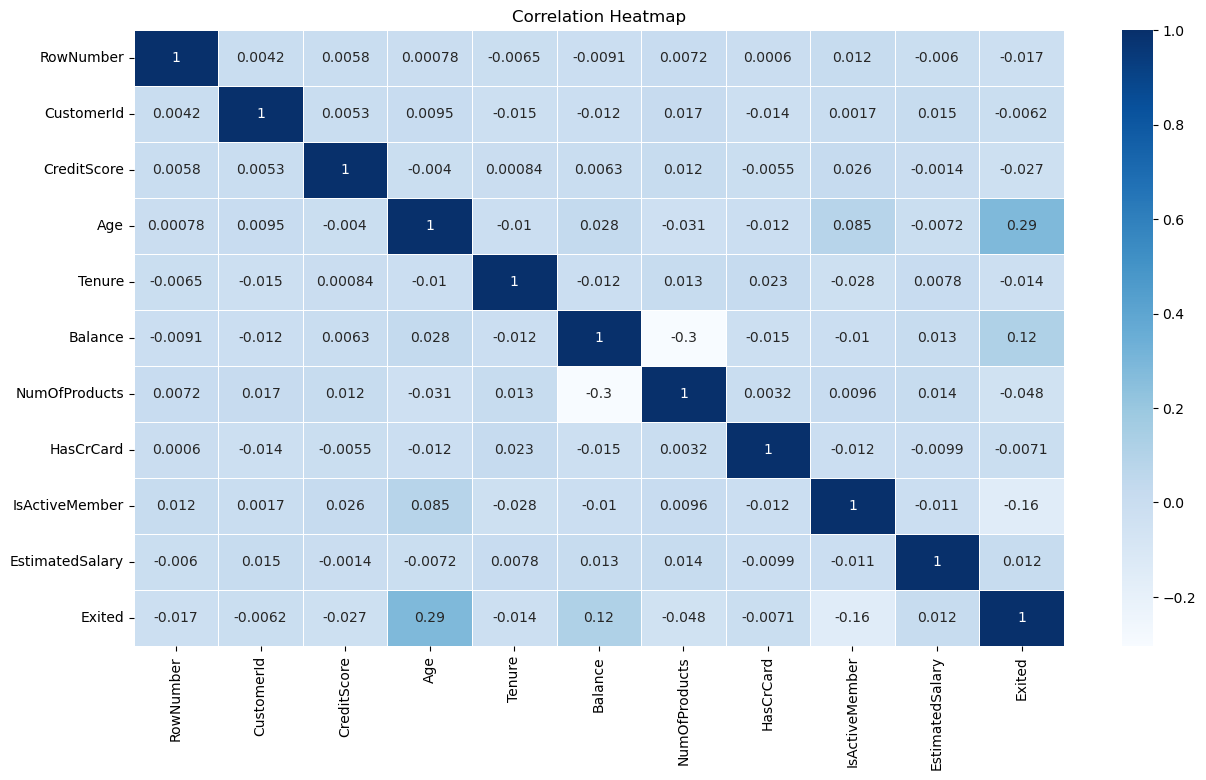

In [16]:
# A better way to visualize the correlations is using the heat map
# We can see that the features are barely correlated 

# The balance and number of products seem to have a stronger correlation (-0.3) to each other compared to others
# it makes since because the more balance you have the more products you are offered

# Exited and age seem to have a stronger correlation (0.29) compared to others, it makes sense because the older you get the 
# less you are interested in having multiple bank accounts (especially after retirement)

# Exited and isActiveMember seem to have a stronger correlation (-0.16) compared to others, it makes sense assuming that
# inactive members would close their accounts eventually

correlation_matrix = df.corr(numeric_only = True)
plt.figure(figsize=(15,8))
sns.heatmap(correlation_matrix, annot=True, linewidths=0.5, cmap="Blues")
plt.title('Correlation Heatmap')
plt.show()

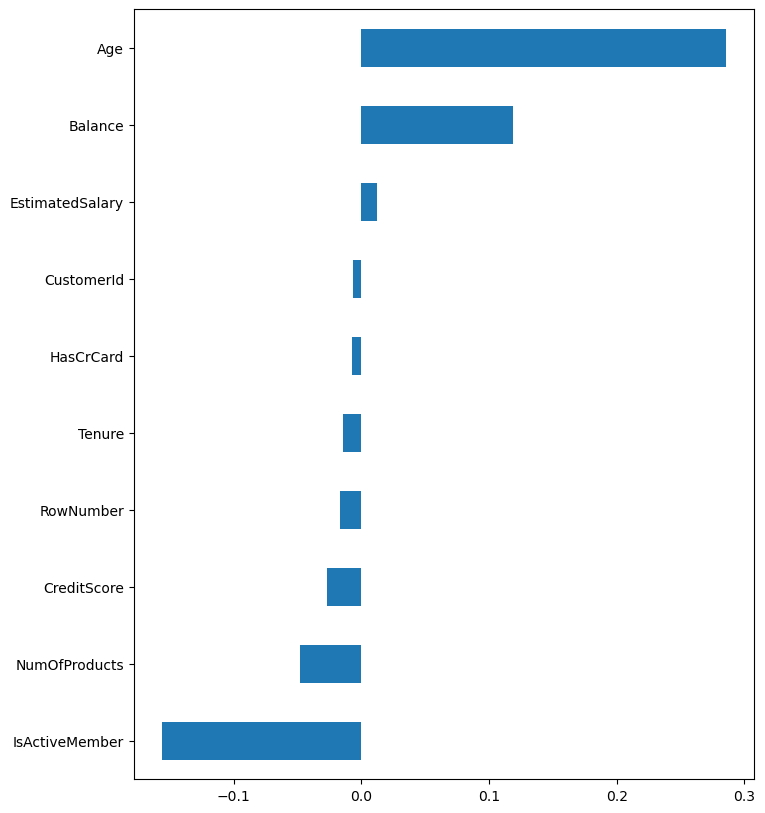

In [17]:
# Now let's look specifcally at the correlations of our features with the target variable (Exited)
# Indeed as we mentioned above the Age and IsActiveMember are correlated to the target variable more than the other features

plt.figure(figsize=(8, 10))
(df.corr(numeric_only = True)["Exited"].sort_values().drop("Exited").plot(kind="barh"))
plt.show()

In [18]:
# We can see the numbers here as well, but in order
df.corr(numeric_only = True)["Exited"].sort_values()

IsActiveMember    -0.156128
NumOfProducts     -0.047820
CreditScore       -0.027094
RowNumber         -0.016571
Tenure            -0.014001
HasCrCard         -0.007138
CustomerId        -0.006248
EstimatedSalary    0.012097
Balance            0.118533
Age                0.285323
Exited             1.000000
Name: Exited, dtype: float64

In [19]:
# Now let us take a look at the non-numeric features: 

df.select_dtypes(include=['object']).columns

Index(['Surname', 'Geography', 'Gender'], dtype='object')

In [20]:
# I assume that the RowNumber, Surname, and CustomerID will have nothing to add regarding the target variable and we don't
# need to identify each customer

In [21]:

# Droping unnecessary features and check the shape:
print(f"The  DataFrame BEFORE dropping unnecessary features: rows are {df.shape[0]} and columns are {df.shape[1]}")
df = df.drop(["CustomerId", "RowNumber", "Surname"], axis=1)

print(f"The  DataFrame AFTER dropping unnecessary features: rows are {df.shape[0]} and columns are {df.shape[1]}")

The  DataFrame BEFORE dropping unnecessary features: rows are 10000 and columns are 14
The  DataFrame AFTER dropping unnecessary features: rows are 10000 and columns are 11


In [22]:
# Checking the number of people who don't have credit cards and spent at least a year
# They represent 24.66%
df[(df["Tenure"] > 1) & (df["HasCrCard"] == 0)].value_counts().sum()

2466

In [23]:
# Checking the number of people who their balance is 0 and are not active members
# They represent 17.44% 
df[(df["Balance"]== 0) & (df["IsActiveMember"] == 0)].value_counts().sum()

1744

In [24]:
# Checking the number of people with a balance more than 0 and are not active members
# They represent 31.05%
df[(df["Balance"]> 0) & (df["IsActiveMember"] == 0)].value_counts().sum()

3105

In [25]:
# Checking the number of people with a balance more than 0 and are active members
# They represent 32.78%
df[(df["Balance"]> 0) & (df["IsActiveMember"] == 1)].value_counts().sum()

3278

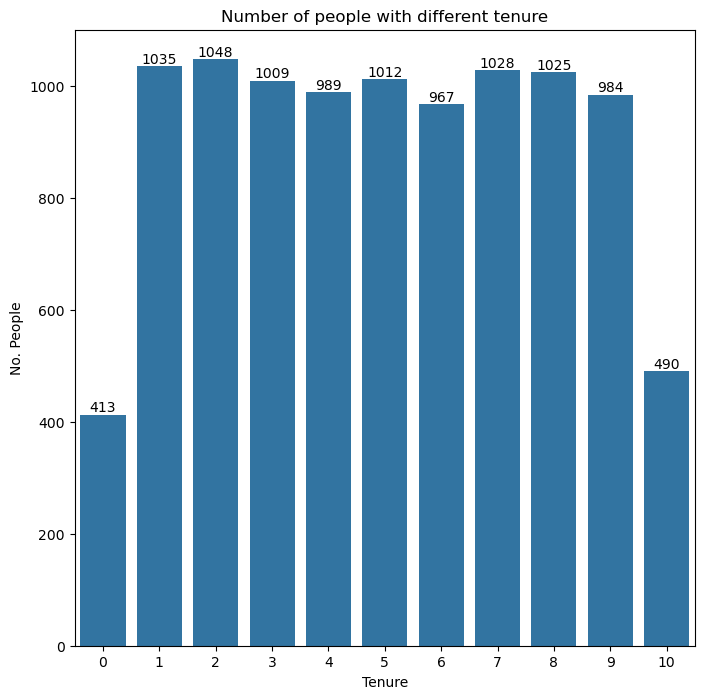

In [26]:
plt.figure(figsize=(8,8))
x = sns.countplot(x ='Tenure', data = df)
plt.title('Number of people with different tenure')
plt.ylabel('No. People')
plt.xlabel('Tenure')

x.bar_label(x.containers[0]);

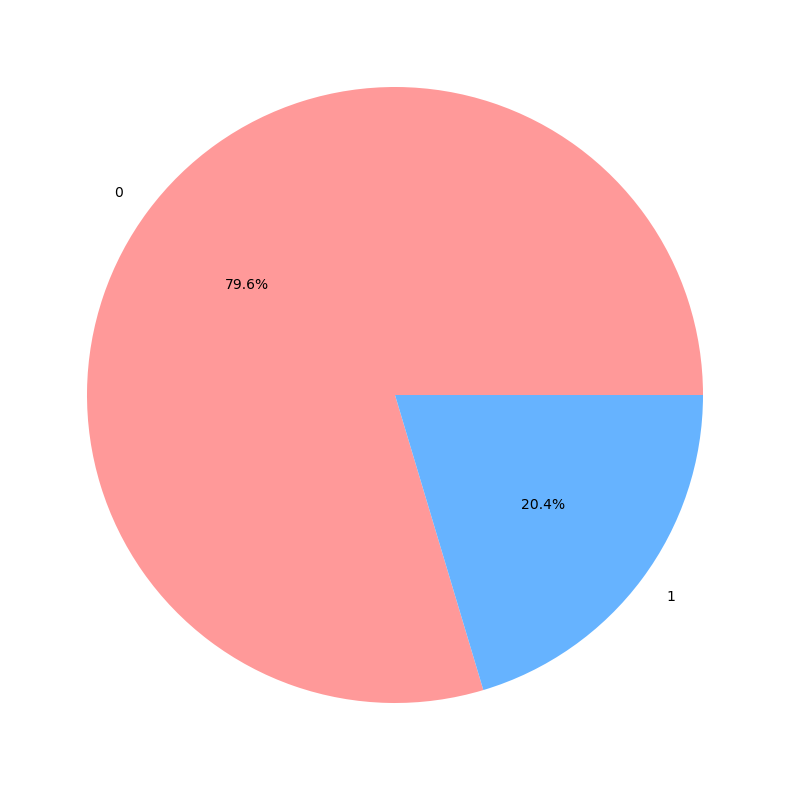

In [27]:
# We can see that the number of observations in each class varies a lot, imbalanced data
custom_colors = ['#ff9999', '#66b3ff']
df["Exited"].value_counts().plot(kind="pie", autopct="%1.1f%%", figsize=(10, 10), colors=custom_colors)
plt.ylabel("");

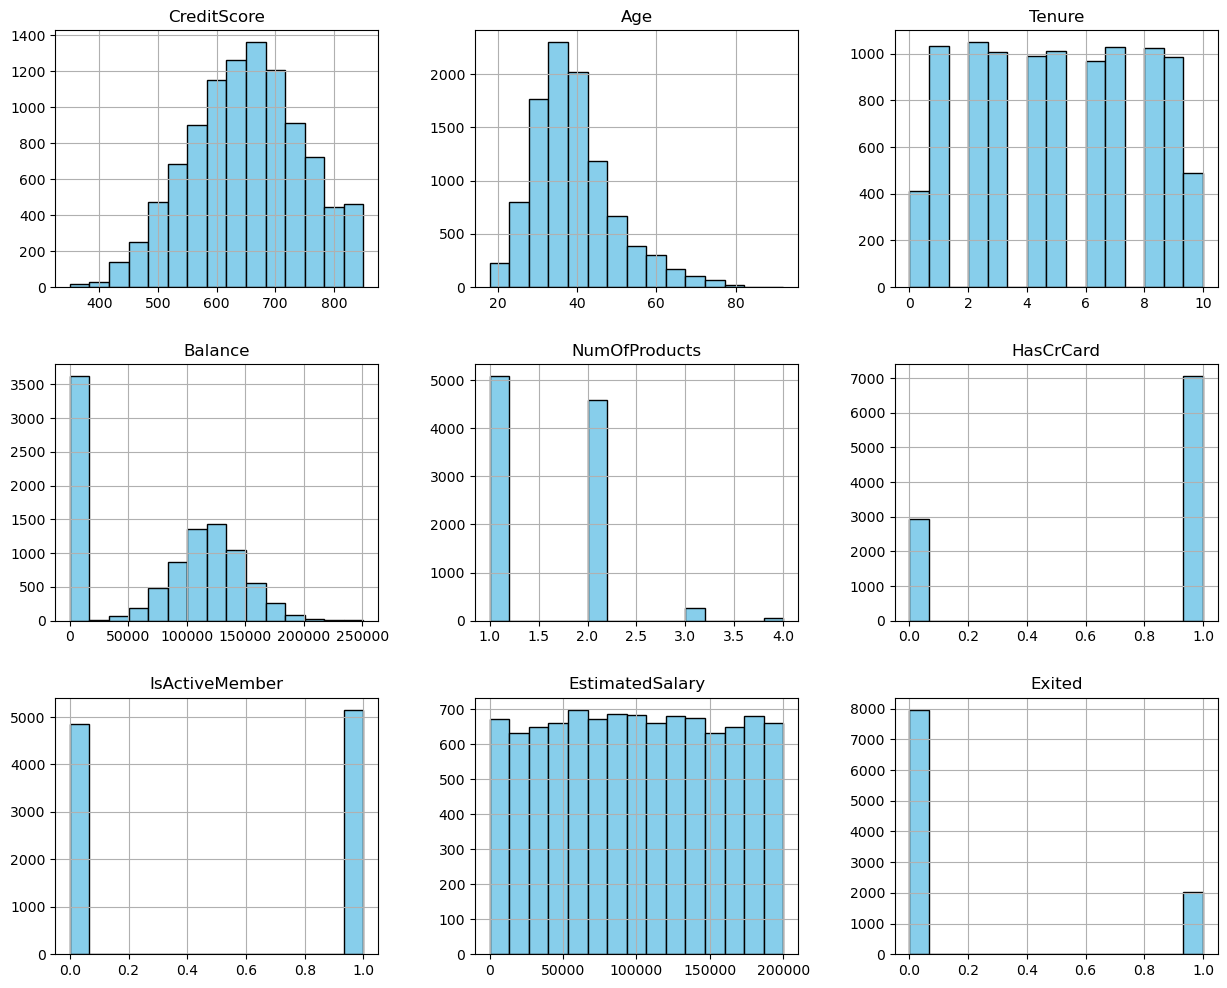

In [28]:
# We can see that CreditScore is almost normally distributed
# The Age is right skewed
# The Tenure represents discrete values
# The balance shows a normal distribution except for the 0 which represents almost 30% alone
# the NumOfProducts this represents discrete values 
# The HasCrCard, IsActiveMember, and Exited represent binary values
# The EstimatedSalary is almost uniformally distributed

df.hist(figsize=(15, 12), bins=15, color='skyblue', edgecolor='black')
plt.show()

In [29]:
from ipywidgets import interact

In [30]:
# Here we use boxplot to see the distribution of the data based on the quartiles

def box_m(model):
    sns.boxplot(data = df, x= "Exited", y = model)

interactive_df = df.select_dtypes(include = 'number').columns[
    df.select_dtypes(include = 'number').columns != 'Exited']

interact(box_m, model=interactive_df);

interactive(children=(Dropdown(description='model', options=('CreditScore', 'Age', 'Tenure', 'Balance', 'NumOf…

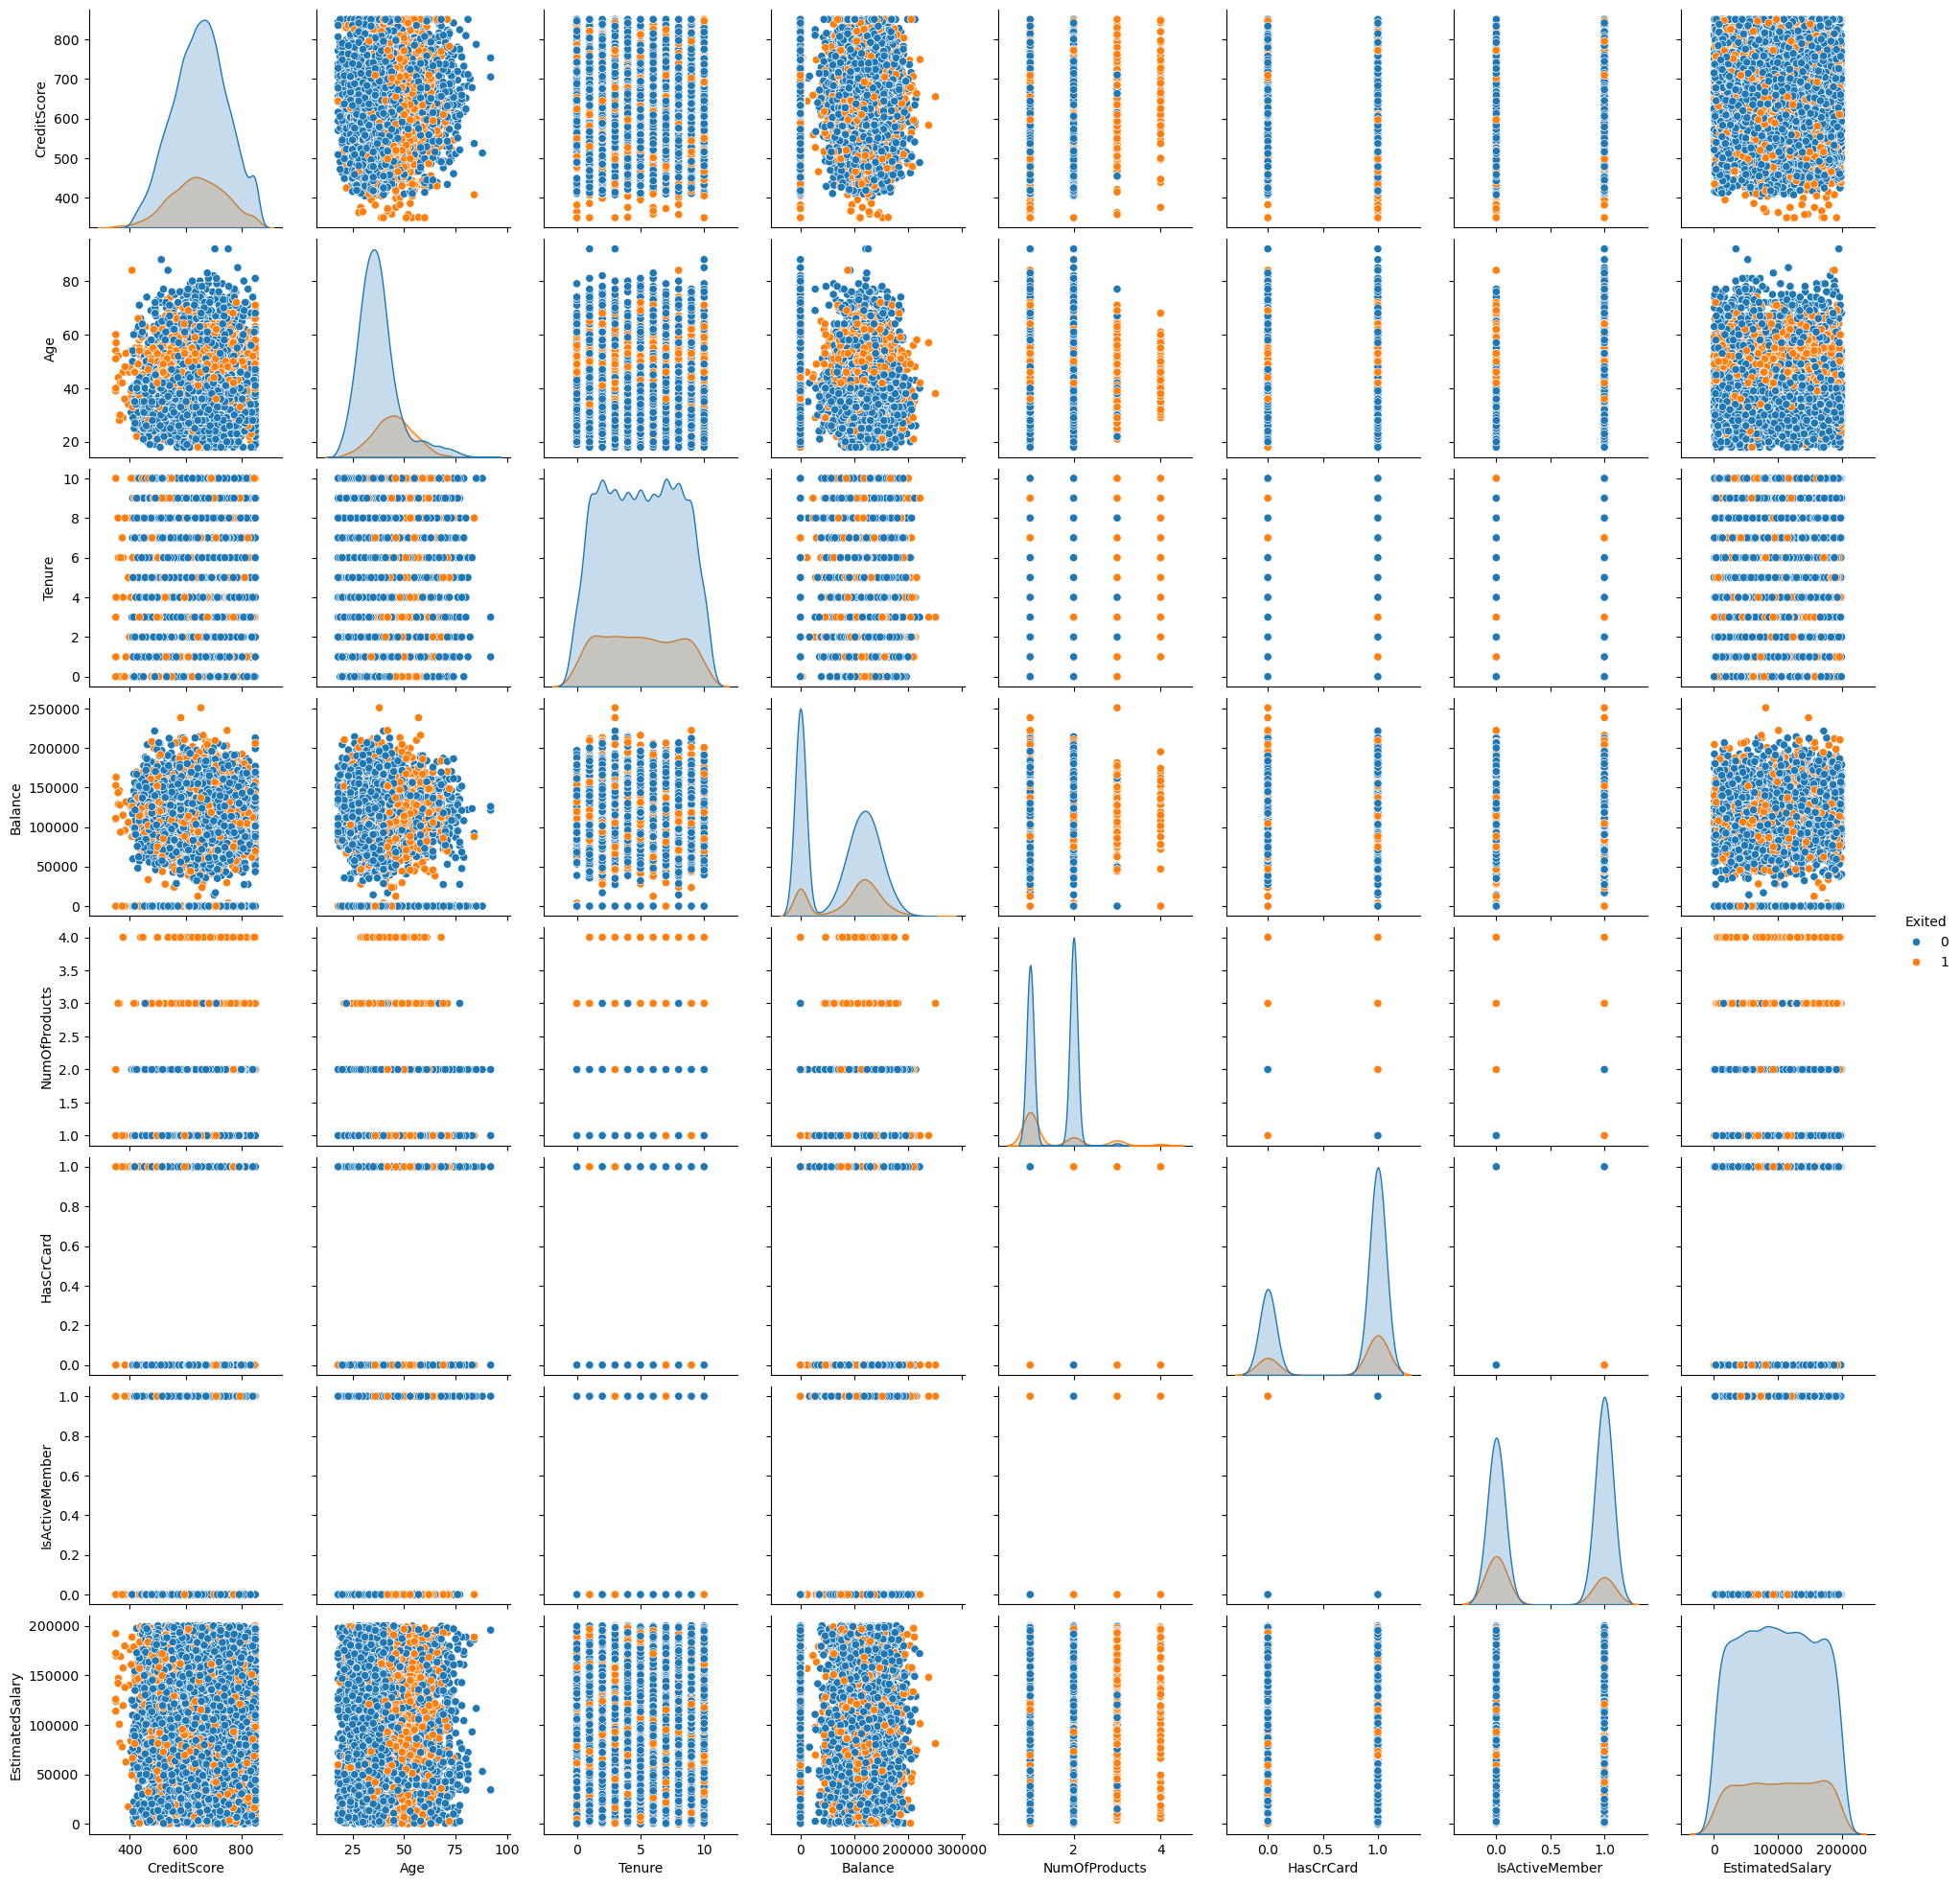

In [31]:
# We can notice from the pair plot that our data points are insanely overlapping
sns.pairplot(df, hue = 'Exited')

In [32]:
# Mapping Gender
df["Gender"] = df["Gender"].map({"Female":0, "Male": 1})

In [33]:
df["Gender"]

0       0
1       0
2       0
3       0
4       0
       ..
9995    1
9996    1
9997    0
9998    1
9999    0
Name: Gender, Length: 10000, dtype: int64

In [34]:
# Creating MinMax scaler 
MinMax_Scaler = MinMaxScaler()


In [35]:
cols_scale = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

In [36]:
column_trans = make_column_transformer((
               OneHotEncoder( handle_unknown='ignore',
                              sparse_output=False), 
                              ["Geography"]), (MinMax_Scaler, cols_scale), 
                              remainder = 'passthrough', 
                              verbose_feature_names_out=False)

# Preprocessing of Data
- Train | Test Split, Scalling

In [37]:
x = df.drop('Exited', axis = 1)
y = df.Exited

In [38]:
# Splitting the data into training and testing sets 

x_train, x_test, y_train, y_test = train_test_split(
    x, y, stratify=y, test_size=0.20, random_state=42
)

In [39]:
# Since the dataset is imbalanced as we saw in the EDA part, it is better to do the split ourselves using stratify
# Stratify makes sure it is taking observations from both classes so the minority class is not left out 

x_train , x_valid, y_train,y_valid =  train_test_split(
    x_train, y_train, stratify=y_train, test_size=0.10, random_state=42
)

In [40]:
# Scaling our different splits of the dataset

x_train = column_trans.fit_transform(x_train)
x_valid = column_trans.transform(x_valid)
x_test = column_trans.transform(x_test)

In [41]:
x_train.shape

(7200, 12)

In [42]:
x_valid.shape

(800, 12)

In [43]:
x_test.shape

(2000, 12)

# Modelling & Model Performance

## without class_weigth

### Create The Model

In [44]:
# This function will be used to create different models since we need them for different cases

def NsO_Model(Metric,lr=0.001):
# Setting the same seed everywhere to make sure we always get the same results 

    SEED = 42
    os.environ["TF_DETERMINISTIC_OPS"] = "1"
    os.environ['PYTHONHASHSEED']=str(SEED)
    random.seed(SEED)
    np.random.seed(SEED)
    tf.random.set_seed(SEED)
    model = Sequential()   
    model.add(Dense(20, activation="relu", input_dim=x_train.shape[1]))
    model.add(Dense(16, activation="relu"))
    model.add(Dense(4, activation="relu"))
    model.add(Dense(1, activation="sigmoid"))
    LR = Adam(learning_rate= lr)
    model.compile(optimizer="adam", loss="binary_crossentropy", metrics=Metric)
    return model

In [45]:
Vanilla_Model = NsO_Model(Metric = "accuracy")

In [46]:
# Here we can see the model's layers and their details
Vanilla_Model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20)                260       
_________________________________________________________________
dense_1 (Dense)              (None, 16)                336       
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 68        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 5         
Total params: 669
Trainable params: 669
Non-trainable params: 0
_________________________________________________________________


In [47]:

Vanilla_Model.fit(
    x=x_train, y=y_train, validation_data=(x_valid,y_valid), batch_size=64, epochs=500, verbose=1)

Epoch 1/500
113/113 [==============================] - 2s 5ms/step - loss: 0.5957 - accuracy: 0.7156 - val_loss: 0.4934 - val_accuracy: 0.7962
Epoch 2/500
113/113 [==============================] - 0s 3ms/step - loss: 0.4747 - accuracy: 0.7962 - val_loss: 0.4647 - val_accuracy: 0.7962
Epoch 3/500
113/113 [==============================] - 0s 4ms/step - loss: 0.4593 - accuracy: 0.7962 - val_loss: 0.4584 - val_accuracy: 0.7962
Epoch 4/500
113/113 [==============================] - 0s 3ms/step - loss: 0.4516 - accuracy: 0.7962 - val_loss: 0.4508 - val_accuracy: 0.7962
Epoch 5/500
113/113 [==============================] - 0s 4ms/step - loss: 0.4448 - accuracy: 0.7962 - val_loss: 0.4426 - val_accuracy: 0.7962
Epoch 6/500
113/113 [==============================] - 0s 3ms/step - loss: 0.4360 - accuracy: 0.7964 - val_loss: 0.4301 - val_accuracy: 0.7962
Epoch 7/500
113/113 [==============================] - 0s 4ms/step - loss: 0.4256 - accuracy: 0.8006 - val_loss: 0.4158 - val_accuracy: 0.8112

Epoch 58/500
113/113 [==============================] - 0s 4ms/step - loss: 0.3404 - accuracy: 0.8582 - val_loss: 0.3290 - val_accuracy: 0.8725
Epoch 59/500
113/113 [==============================] - 0s 4ms/step - loss: 0.3417 - accuracy: 0.8565 - val_loss: 0.3324 - val_accuracy: 0.8625
Epoch 60/500
113/113 [==============================] - 0s 4ms/step - loss: 0.3410 - accuracy: 0.8571 - val_loss: 0.3282 - val_accuracy: 0.8612
Epoch 61/500
113/113 [==============================] - 0s 4ms/step - loss: 0.3400 - accuracy: 0.8593 - val_loss: 0.3350 - val_accuracy: 0.8675
Epoch 62/500
113/113 [==============================] - 0s 4ms/step - loss: 0.3401 - accuracy: 0.8574 - val_loss: 0.3278 - val_accuracy: 0.8662
Epoch 63/500
113/113 [==============================] - 0s 4ms/step - loss: 0.3398 - accuracy: 0.8565 - val_loss: 0.3283 - val_accuracy: 0.8687
Epoch 64/500
113/113 [==============================] - 0s 4ms/step - loss: 0.3393 - accuracy: 0.8582 - val_loss: 0.3289 - val_accuracy:

Epoch 115/500
113/113 [==============================] - 1s 5ms/step - loss: 0.3332 - accuracy: 0.8612 - val_loss: 0.3247 - val_accuracy: 0.8712
Epoch 116/500
113/113 [==============================] - 1s 5ms/step - loss: 0.3317 - accuracy: 0.8644 - val_loss: 0.3255 - val_accuracy: 0.8687
Epoch 117/500
113/113 [==============================] - 1s 5ms/step - loss: 0.3318 - accuracy: 0.8619 - val_loss: 0.3267 - val_accuracy: 0.8675
Epoch 118/500
113/113 [==============================] - 1s 5ms/step - loss: 0.3322 - accuracy: 0.8632 - val_loss: 0.3282 - val_accuracy: 0.8700
Epoch 119/500
113/113 [==============================] - 1s 5ms/step - loss: 0.3311 - accuracy: 0.8635 - val_loss: 0.3264 - val_accuracy: 0.8687
Epoch 120/500
113/113 [==============================] - 1s 5ms/step - loss: 0.3315 - accuracy: 0.8635 - val_loss: 0.3281 - val_accuracy: 0.8712
Epoch 121/500
113/113 [==============================] - 0s 4ms/step - loss: 0.3322 - accuracy: 0.8619 - val_loss: 0.3251 - val_ac

113/113 [==============================] - 1s 6ms/step - loss: 0.3250 - accuracy: 0.8639 - val_loss: 0.3248 - val_accuracy: 0.8763
Epoch 172/500
113/113 [==============================] - 1s 5ms/step - loss: 0.3253 - accuracy: 0.8640 - val_loss: 0.3298 - val_accuracy: 0.8750
Epoch 173/500
113/113 [==============================] - 1s 5ms/step - loss: 0.3261 - accuracy: 0.8633 - val_loss: 0.3250 - val_accuracy: 0.8750
Epoch 174/500
113/113 [==============================] - 1s 5ms/step - loss: 0.3258 - accuracy: 0.8650 - val_loss: 0.3236 - val_accuracy: 0.8700
Epoch 175/500
113/113 [==============================] - 1s 5ms/step - loss: 0.3252 - accuracy: 0.8654 - val_loss: 0.3247 - val_accuracy: 0.8737
Epoch 176/500
113/113 [==============================] - 1s 5ms/step - loss: 0.3243 - accuracy: 0.8651 - val_loss: 0.3235 - val_accuracy: 0.8700
Epoch 177/500
113/113 [==============================] - 0s 4ms/step - loss: 0.3262 - accuracy: 0.8649 - val_loss: 0.3248 - val_accuracy: 0.8737

113/113 [==============================] - 0s 4ms/step - loss: 0.3211 - accuracy: 0.8679 - val_loss: 0.3243 - val_accuracy: 0.8725
Epoch 228/500
113/113 [==============================] - 0s 4ms/step - loss: 0.3207 - accuracy: 0.8657 - val_loss: 0.3246 - val_accuracy: 0.8763
Epoch 229/500
113/113 [==============================] - 1s 5ms/step - loss: 0.3206 - accuracy: 0.8669 - val_loss: 0.3251 - val_accuracy: 0.8662
Epoch 230/500
113/113 [==============================] - 1s 4ms/step - loss: 0.3201 - accuracy: 0.8664 - val_loss: 0.3199 - val_accuracy: 0.8700
Epoch 231/500
113/113 [==============================] - 0s 4ms/step - loss: 0.3212 - accuracy: 0.8668 - val_loss: 0.3216 - val_accuracy: 0.8700
Epoch 232/500
113/113 [==============================] - 0s 4ms/step - loss: 0.3206 - accuracy: 0.8643 - val_loss: 0.3271 - val_accuracy: 0.8600
Epoch 233/500
113/113 [==============================] - 1s 5ms/step - loss: 0.3197 - accuracy: 0.8682 - val_loss: 0.3262 - val_accuracy: 0.8712

113/113 [==============================] - 1s 5ms/step - loss: 0.3185 - accuracy: 0.8675 - val_loss: 0.3247 - val_accuracy: 0.8712
Epoch 284/500
113/113 [==============================] - 1s 4ms/step - loss: 0.3173 - accuracy: 0.8664 - val_loss: 0.3244 - val_accuracy: 0.8750
Epoch 285/500
113/113 [==============================] - 1s 4ms/step - loss: 0.3161 - accuracy: 0.8650 - val_loss: 0.3254 - val_accuracy: 0.8737
Epoch 286/500
113/113 [==============================] - 1s 4ms/step - loss: 0.3169 - accuracy: 0.8656 - val_loss: 0.3204 - val_accuracy: 0.8737
Epoch 287/500
113/113 [==============================] - 0s 4ms/step - loss: 0.3163 - accuracy: 0.8662 - val_loss: 0.3229 - val_accuracy: 0.8675
Epoch 288/500
113/113 [==============================] - 1s 4ms/step - loss: 0.3176 - accuracy: 0.8653 - val_loss: 0.3216 - val_accuracy: 0.8737
Epoch 289/500
113/113 [==============================] - 0s 4ms/step - loss: 0.3178 - accuracy: 0.8658 - val_loss: 0.3266 - val_accuracy: 0.8587

113/113 [==============================] - 0s 4ms/step - loss: 0.3133 - accuracy: 0.8686 - val_loss: 0.3285 - val_accuracy: 0.8662
Epoch 340/500
113/113 [==============================] - 0s 4ms/step - loss: 0.3161 - accuracy: 0.8644 - val_loss: 0.3261 - val_accuracy: 0.8675
Epoch 341/500
113/113 [==============================] - 0s 4ms/step - loss: 0.3125 - accuracy: 0.8674 - val_loss: 0.3234 - val_accuracy: 0.8712
Epoch 342/500
113/113 [==============================] - 1s 5ms/step - loss: 0.3138 - accuracy: 0.8653 - val_loss: 0.3253 - val_accuracy: 0.8700
Epoch 343/500
113/113 [==============================] - 0s 4ms/step - loss: 0.3133 - accuracy: 0.8669 - val_loss: 0.3213 - val_accuracy: 0.8737
Epoch 344/500
113/113 [==============================] - 0s 4ms/step - loss: 0.3131 - accuracy: 0.8703 - val_loss: 0.3263 - val_accuracy: 0.8687
Epoch 345/500
113/113 [==============================] - 0s 4ms/step - loss: 0.3138 - accuracy: 0.8661 - val_loss: 0.3235 - val_accuracy: 0.8725

113/113 [==============================] - 1s 5ms/step - loss: 0.3123 - accuracy: 0.8685 - val_loss: 0.3285 - val_accuracy: 0.8662
Epoch 396/500
113/113 [==============================] - 1s 5ms/step - loss: 0.3116 - accuracy: 0.8686 - val_loss: 0.3334 - val_accuracy: 0.8775
Epoch 397/500
113/113 [==============================] - 1s 5ms/step - loss: 0.3111 - accuracy: 0.8697 - val_loss: 0.3264 - val_accuracy: 0.8687
Epoch 398/500
113/113 [==============================] - 0s 4ms/step - loss: 0.3107 - accuracy: 0.8675 - val_loss: 0.3270 - val_accuracy: 0.8712
Epoch 399/500
113/113 [==============================] - 1s 5ms/step - loss: 0.3118 - accuracy: 0.8671 - val_loss: 0.3243 - val_accuracy: 0.8725
Epoch 400/500
113/113 [==============================] - 1s 5ms/step - loss: 0.3120 - accuracy: 0.8662 - val_loss: 0.3246 - val_accuracy: 0.8725
Epoch 401/500
113/113 [==============================] - 0s 4ms/step - loss: 0.3102 - accuracy: 0.8678 - val_loss: 0.3295 - val_accuracy: 0.8687

113/113 [==============================] - 0s 4ms/step - loss: 0.3085 - accuracy: 0.8697 - val_loss: 0.3332 - val_accuracy: 0.8575
Epoch 452/500
113/113 [==============================] - 1s 5ms/step - loss: 0.3106 - accuracy: 0.8690 - val_loss: 0.3283 - val_accuracy: 0.8700
Epoch 453/500
113/113 [==============================] - 1s 5ms/step - loss: 0.3086 - accuracy: 0.8712 - val_loss: 0.3305 - val_accuracy: 0.8650
Epoch 454/500
113/113 [==============================] - 1s 5ms/step - loss: 0.3086 - accuracy: 0.8696 - val_loss: 0.3272 - val_accuracy: 0.8637
Epoch 455/500
113/113 [==============================] - 1s 5ms/step - loss: 0.3080 - accuracy: 0.8694 - val_loss: 0.3340 - val_accuracy: 0.8575
Epoch 456/500
113/113 [==============================] - 1s 5ms/step - loss: 0.3092 - accuracy: 0.8699 - val_loss: 0.3271 - val_accuracy: 0.8725
Epoch 457/500
113/113 [==============================] - 1s 5ms/step - loss: 0.3107 - accuracy: 0.8694 - val_loss: 0.3273 - val_accuracy: 0.8687

In [48]:
# Here we can see the head of the accuracy and loss values for both training and validation
loss_df = pd.DataFrame(Vanilla_Model.history.history)
loss_df.head()

loss  accuracy  val_loss  val_accuracy
0  0.595668  0.715556  0.493398       0.79625
1  0.474721  0.796250  0.464745       0.79625
2  0.459331  0.796250  0.458361       0.79625
3  0.451565  0.796250  0.450798       0.79625
4  0.444819  0.796250  0.442646       0.79625

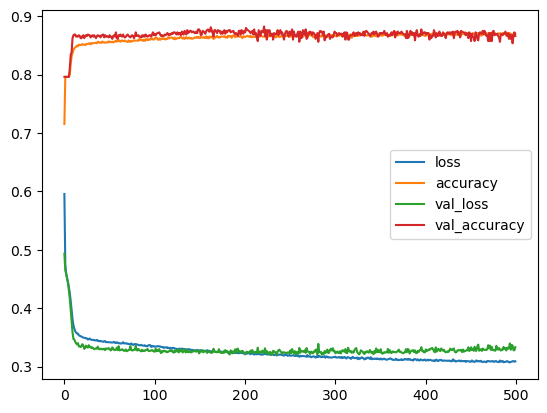

In [49]:
# We can see if there's overfitting using the graph
loss_df.plot()
plt.show()

In [50]:
# It seems like there is no overfitting for this number of epochs, but maybe if we use a bigger number than there will be

In [51]:
loss, accuracy = Vanilla_Model.evaluate(x_test, y_test, verbose=0)
print("loss: ", loss)
print("accuracy: ", accuracy)

loss:  0.359377384185791
accuracy:  0.8539999723434448


In [52]:
from sklearn.metrics import roc_curve, auc

def model_Evaluation_results(model, x_train, y_train, x_test, y_test):
    # Make predictions on the test and training sets
    y_pred = model.predict(x_test) > 0.5
    y_train_pred = model.predict(x_train) > 0.5
    y_pred_p = model.predict(x_test)
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# The confusion matrix for the testing values -------------------------------------------------------------

    cm_test = confusion_matrix(y_test, y_pred)
    disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=[0, 1])
    disp_test.plot(cmap='Blues', ax=axes[0])
    axes[0].set_title('Testing Set Confusion Matrix')

# The confusion matrix for the training values -------------------------------------------------------------
    
    cm_train = confusion_matrix(y_train, y_train_pred)
    disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=[0, 1])
    disp_train.plot(cmap='Blues', ax=axes[1])
    axes[1].set_title('Training Set Confusion Matrix')

    plt.show()

# Classification reports ----------------------------------------------------------------------------------

    train_report = classification_report(y_train, y_train_pred)
    test_report = classification_report(y_test, y_pred)

    print(f'''
----------------------------- Training -----------------------------\n\n
{train_report}
                        
----------------------------- Testing -----------------------------\n\n
{test_report}
''')
    
# ROC ----------------------------------------------------------------------------------------------------

    fpr, tpr, _ = roc_curve(y_test, y_pred_p)
    roc_auc = auc(fpr, tpr)
    
    print('----------------------------- ROC -----------------------------\n\n')

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc='lower right')
    plt.show()


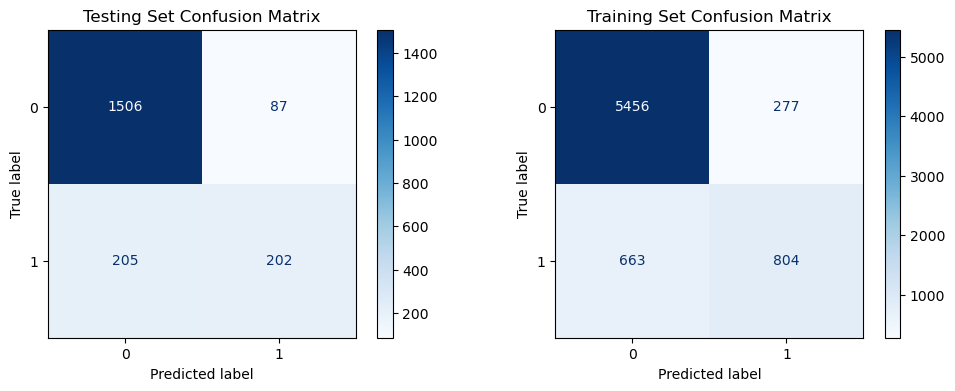


----------------------------- Training -----------------------------


              precision    recall  f1-score   support

           0       0.89      0.95      0.92      5733
           1       0.74      0.55      0.63      1467

    accuracy                           0.87      7200
   macro avg       0.82      0.75      0.78      7200
weighted avg       0.86      0.87      0.86      7200

                        
----------------------------- Testing -----------------------------


              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1593
           1       0.70      0.50      0.58       407

    accuracy                           0.85      2000
   macro avg       0.79      0.72      0.75      2000
weighted avg       0.84      0.85      0.84      2000


----------------------------- ROC -----------------------------




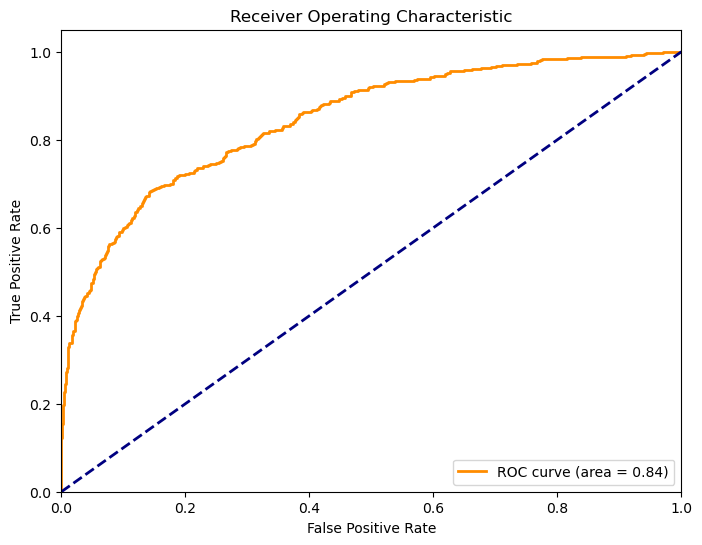

In [53]:
model_Evaluation_results(Vanilla_Model, x_train, y_train, x_test, y_test)

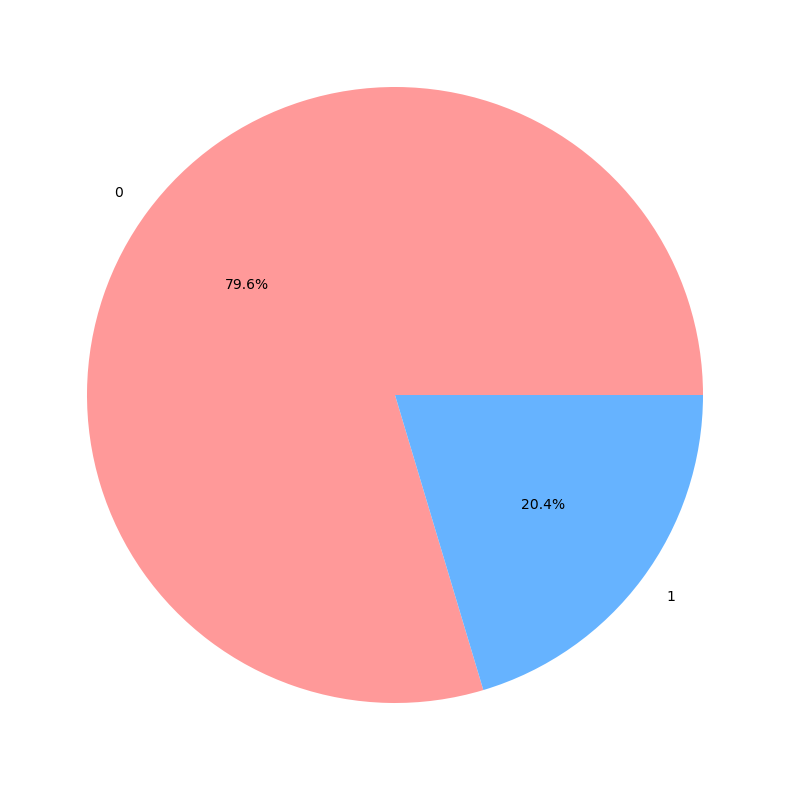

In [54]:
# As we can see from the previous results, the accuracy seems to be good, but the problem is as we saw in the EDA 
# (See the pie plot below) the imbalance of the data (79.6% to 20.4%) gives a bad recall for the minority class
# which means we cannot rely on the accuracy for the overall best performance of the model
# From now on we will focus on the recall 

custom_colors = ['#ff9999', '#66b3ff']
df["Exited"].value_counts().plot(kind="pie", autopct="%1.1f%%", figsize=(10, 10), colors=custom_colors)
plt.ylabel("");

In [65]:
# Testing again while focusing on the Recall (Just to monitor the changes in the recall specifically): 

SEED = 42
os.environ["TF_DETERMINISTIC_OPS"] = "1"
os.environ['PYTHONHASHSEED']=str(SEED)
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)
Vanilla_Model_Recall = Sequential()   
Vanilla_Model_Recall.add(Dense(20, activation="relu", input_dim=x_train.shape[1]))
Vanilla_Model_Recall.add(Dense(16, activation="relu"))
Vanilla_Model_Recall.add(Dense(4, activation="relu"))
Vanilla_Model_Recall.add(Dense(1, activation="sigmoid"))
LR = Adam(learning_rate= 0.001)
Vanilla_Model_Recall.compile(optimizer="adam", loss="binary_crossentropy", metrics="Recall")

In [66]:
# Here we can see the model's layers and their details
Vanilla_Model_Recall.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 20)                260       
_________________________________________________________________
dense_17 (Dense)             (None, 16)                336       
_________________________________________________________________
dense_18 (Dense)             (None, 4)                 68        
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 5         
Total params: 669
Trainable params: 669
Non-trainable params: 0
_________________________________________________________________


In [67]:
Vanilla_Model_Recall.fit(
    x=x_train, y=y_train, validation_data=(x_valid,y_valid), batch_size=64, epochs=500, verbose=1)

Epoch 1/500
113/113 [==============================] - 1s 7ms/step - loss: 0.5957 - recall: 0.1302 - val_loss: 0.4934 - val_recall: 0.0000e+00
Epoch 2/500
113/113 [==============================] - 1s 5ms/step - loss: 0.4747 - recall: 0.0000e+00 - val_loss: 0.4647 - val_recall: 0.0000e+00
Epoch 3/500
113/113 [==============================] - 0s 4ms/step - loss: 0.4593 - recall: 0.0000e+00 - val_loss: 0.4584 - val_recall: 0.0000e+00
Epoch 4/500
113/113 [==============================] - 0s 4ms/step - loss: 0.4516 - recall: 0.0000e+00 - val_loss: 0.4508 - val_recall: 0.0000e+00
Epoch 5/500
113/113 [==============================] - 1s 5ms/step - loss: 0.4448 - recall: 0.0000e+00 - val_loss: 0.4426 - val_recall: 0.0000e+00
Epoch 6/500
113/113 [==============================] - 1s 5ms/step - loss: 0.4360 - recall: 6.8166e-04 - val_loss: 0.4301 - val_recall: 0.0000e+00
Epoch 7/500
113/113 [==============================] - 0s 4ms/step - loss: 0.4256 - recall: 0.0389 - val_loss: 0.4158 - va

113/113 [==============================] - 1s 5ms/step - loss: 0.3417 - recall: 0.4404 - val_loss: 0.3324 - val_recall: 0.4908
Epoch 60/500
113/113 [==============================] - 1s 7ms/step - loss: 0.3410 - recall: 0.4404 - val_loss: 0.3282 - val_recall: 0.4847
Epoch 61/500
113/113 [==============================] - 1s 5ms/step - loss: 0.3400 - recall: 0.4513 - val_loss: 0.3350 - val_recall: 0.4049
Epoch 62/500
113/113 [==============================] - 1s 6ms/step - loss: 0.3401 - recall: 0.4335 - val_loss: 0.3278 - val_recall: 0.4724
Epoch 63/500
113/113 [==============================] - 1s 4ms/step - loss: 0.3398 - recall: 0.4438 - val_loss: 0.3283 - val_recall: 0.4908
Epoch 64/500
113/113 [==============================] - 0s 4ms/step - loss: 0.3393 - recall: 0.4465 - val_loss: 0.3289 - val_recall: 0.4724
Epoch 65/500
113/113 [==============================] - 1s 5ms/step - loss: 0.3404 - recall: 0.4438 - val_loss: 0.3298 - val_recall: 0.4417
Epoch 66/500
113/113 [===========

113/113 [==============================] - 1s 5ms/step - loss: 0.3318 - recall: 0.4622 - val_loss: 0.3267 - val_recall: 0.4540
Epoch 118/500
113/113 [==============================] - 1s 5ms/step - loss: 0.3322 - recall: 0.4519 - val_loss: 0.3282 - val_recall: 0.4908
Epoch 119/500
113/113 [==============================] - 1s 5ms/step - loss: 0.3311 - recall: 0.4601 - val_loss: 0.3264 - val_recall: 0.4294
Epoch 120/500
113/113 [==============================] - 1s 5ms/step - loss: 0.3315 - recall: 0.4519 - val_loss: 0.3281 - val_recall: 0.4417
Epoch 121/500
113/113 [==============================] - 1s 5ms/step - loss: 0.3322 - recall: 0.4526 - val_loss: 0.3251 - val_recall: 0.4847
Epoch 122/500
113/113 [==============================] - 1s 5ms/step - loss: 0.3320 - recall: 0.4513 - val_loss: 0.3238 - val_recall: 0.4908
Epoch 123/500
113/113 [==============================] - 0s 4ms/step - loss: 0.3307 - recall: 0.4683 - val_loss: 0.3272 - val_recall: 0.4601
Epoch 124/500
113/113 [====

113/113 [==============================] - 1s 5ms/step - loss: 0.3252 - recall: 0.4860 - val_loss: 0.3247 - val_recall: 0.4601
Epoch 176/500
113/113 [==============================] - 1s 5ms/step - loss: 0.3243 - recall: 0.4778 - val_loss: 0.3235 - val_recall: 0.4785
Epoch 177/500
113/113 [==============================] - 1s 5ms/step - loss: 0.3262 - recall: 0.4765 - val_loss: 0.3248 - val_recall: 0.4785
Epoch 178/500
113/113 [==============================] - 1s 5ms/step - loss: 0.3247 - recall: 0.4806 - val_loss: 0.3238 - val_recall: 0.4785
Epoch 179/500
113/113 [==============================] - 1s 5ms/step - loss: 0.3261 - recall: 0.4717 - val_loss: 0.3284 - val_recall: 0.4356
Epoch 180/500
113/113 [==============================] - 1s 5ms/step - loss: 0.3248 - recall: 0.4703 - val_loss: 0.3252 - val_recall: 0.4908
Epoch 181/500
113/113 [==============================] - 1s 5ms/step - loss: 0.3255 - recall: 0.4751 - val_loss: 0.3270 - val_recall: 0.5031
Epoch 182/500
113/113 [====

113/113 [==============================] - 1s 5ms/step - loss: 0.3197 - recall: 0.4881 - val_loss: 0.3262 - val_recall: 0.5215
Epoch 234/500
113/113 [==============================] - 1s 5ms/step - loss: 0.3206 - recall: 0.4833 - val_loss: 0.3246 - val_recall: 0.5153
Epoch 235/500
113/113 [==============================] - 1s 5ms/step - loss: 0.3218 - recall: 0.4772 - val_loss: 0.3245 - val_recall: 0.5399
Epoch 236/500
113/113 [==============================] - 1s 5ms/step - loss: 0.3190 - recall: 0.4860 - val_loss: 0.3198 - val_recall: 0.5215
Epoch 237/500
113/113 [==============================] - 1s 5ms/step - loss: 0.3201 - recall: 0.4949 - val_loss: 0.3257 - val_recall: 0.5153
Epoch 238/500
113/113 [==============================] - 1s 5ms/step - loss: 0.3201 - recall: 0.4840 - val_loss: 0.3281 - val_recall: 0.5215
Epoch 239/500
113/113 [==============================] - 1s 5ms/step - loss: 0.3206 - recall: 0.4826 - val_loss: 0.3291 - val_recall: 0.4479
Epoch 240/500
113/113 [====

113/113 [==============================] - 1s 5ms/step - loss: 0.3175 - recall: 0.5017 - val_loss: 0.3267 - val_recall: 0.5399
Epoch 292/500
113/113 [==============================] - 1s 5ms/step - loss: 0.3169 - recall: 0.4928 - val_loss: 0.3292 - val_recall: 0.5521
Epoch 293/500
113/113 [==============================] - 1s 5ms/step - loss: 0.3156 - recall: 0.4963 - val_loss: 0.3232 - val_recall: 0.5276
Epoch 294/500
113/113 [==============================] - 1s 5ms/step - loss: 0.3160 - recall: 0.4990 - val_loss: 0.3240 - val_recall: 0.4785
Epoch 295/500
113/113 [==============================] - 1s 5ms/step - loss: 0.3159 - recall: 0.4949 - val_loss: 0.3290 - val_recall: 0.5583
Epoch 296/500
113/113 [==============================] - 1s 6ms/step - loss: 0.3154 - recall: 0.4963 - val_loss: 0.3307 - val_recall: 0.5460
Epoch 297/500
113/113 [==============================] - 1s 6ms/step - loss: 0.3155 - recall: 0.4915 - val_loss: 0.3276 - val_recall: 0.5399
Epoch 298/500
113/113 [====

113/113 [==============================] - 1s 5ms/step - loss: 0.3134 - recall: 0.5085 - val_loss: 0.3248 - val_recall: 0.5031
Epoch 350/500
113/113 [==============================] - 1s 6ms/step - loss: 0.3123 - recall: 0.4935 - val_loss: 0.3245 - val_recall: 0.4847
Epoch 351/500
113/113 [==============================] - 1s 6ms/step - loss: 0.3140 - recall: 0.5099 - val_loss: 0.3298 - val_recall: 0.5399
Epoch 352/500
113/113 [==============================] - 1s 5ms/step - loss: 0.3125 - recall: 0.4908 - val_loss: 0.3235 - val_recall: 0.4847
Epoch 353/500
113/113 [==============================] - 1s 5ms/step - loss: 0.3123 - recall: 0.4949 - val_loss: 0.3221 - val_recall: 0.5092
Epoch 354/500
113/113 [==============================] - 1s 5ms/step - loss: 0.3133 - recall: 0.4983 - val_loss: 0.3230 - val_recall: 0.5153
Epoch 355/500
113/113 [==============================] - 1s 5ms/step - loss: 0.3136 - recall: 0.5031 - val_loss: 0.3248 - val_recall: 0.4785
Epoch 356/500
113/113 [====

113/113 [==============================] - 1s 6ms/step - loss: 0.3107 - recall: 0.5072 - val_loss: 0.3310 - val_recall: 0.4172
Epoch 408/500
113/113 [==============================] - 1s 5ms/step - loss: 0.3105 - recall: 0.4997 - val_loss: 0.3321 - val_recall: 0.5153
Epoch 409/500
113/113 [==============================] - 1s 6ms/step - loss: 0.3100 - recall: 0.5140 - val_loss: 0.3298 - val_recall: 0.5092
Epoch 410/500
113/113 [==============================] - 1s 5ms/step - loss: 0.3107 - recall: 0.5106 - val_loss: 0.3263 - val_recall: 0.5153
Epoch 411/500
113/113 [==============================] - 1s 6ms/step - loss: 0.3093 - recall: 0.5078 - val_loss: 0.3246 - val_recall: 0.5276
Epoch 412/500
113/113 [==============================] - 1s 5ms/step - loss: 0.3115 - recall: 0.5058 - val_loss: 0.3331 - val_recall: 0.5644
Epoch 413/500
113/113 [==============================] - 1s 6ms/step - loss: 0.3119 - recall: 0.5044 - val_loss: 0.3256 - val_recall: 0.4908
Epoch 414/500
113/113 [====

113/113 [==============================] - 1s 5ms/step - loss: 0.3085 - recall: 0.5147 - val_loss: 0.3291 - val_recall: 0.4724
Epoch 466/500
113/113 [==============================] - 1s 5ms/step - loss: 0.3087 - recall: 0.5106 - val_loss: 0.3286 - val_recall: 0.5153
Epoch 467/500
113/113 [==============================] - 1s 6ms/step - loss: 0.3080 - recall: 0.5112 - val_loss: 0.3290 - val_recall: 0.5153
Epoch 468/500
113/113 [==============================] - 1s 5ms/step - loss: 0.3075 - recall: 0.5181 - val_loss: 0.3283 - val_recall: 0.4601
Epoch 469/500
113/113 [==============================] - 1s 6ms/step - loss: 0.3097 - recall: 0.5072 - val_loss: 0.3300 - val_recall: 0.4540
Epoch 470/500
113/113 [==============================] - 1s 5ms/step - loss: 0.3092 - recall: 0.5051 - val_loss: 0.3367 - val_recall: 0.5706
Epoch 471/500
113/113 [==============================] - 1s 6ms/step - loss: 0.3095 - recall: 0.5201 - val_loss: 0.3314 - val_recall: 0.5215
Epoch 472/500
113/113 [====

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [95]:
# Here we can see the head of the accuracy and loss values for both training and validation
# Showing the 20 first values because showing the first 5 will make it confusing as they are 0s
Vanilla_recall = pd.DataFrame(Vanilla_Model_Recall.history.history)
Vanilla_recall.head(20)

loss    recall  val_loss  val_recall
0   0.595668  0.130198  0.493398    0.000000
1   0.474721  0.000000  0.464745    0.000000
2   0.459331  0.000000  0.458361    0.000000
3   0.451565  0.000000  0.450798    0.000000
4   0.444819  0.000000  0.442646    0.000000
5   0.435965  0.000682  0.430096    0.000000
6   0.425644  0.038855  0.415822    0.085890
7   0.412346  0.183367  0.397233    0.257669
8   0.396248  0.276755  0.378403    0.257669
9   0.380959  0.349012  0.358727    0.429448
10  0.370984  0.376960  0.347257    0.423313
11  0.364992  0.403545  0.346495    0.429448
12  0.360514  0.413770  0.342562    0.441718
13  0.358326  0.415133  0.339883    0.503067
14  0.356558  0.428085  0.338149    0.472393
15  0.356545  0.426721  0.340106    0.423313
16  0.353521  0.429448  0.334525    0.447853
17  0.352845  0.428766  0.334537    0.490798
18  0.352130  0.424676  0.333635    0.466258
19  0.351369  0.432175  0.335412    0.478528

In [113]:
# We use this function to show the loss and recall separately 
import matplotlib.pyplot as plt

def plot_subplots(history):

    

    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

    # Plotting the first subplot (valscores1)
    valscores1 = history.drop(columns=["recall", "val_recall"], axis=1)
    valscores1.plot(ax=axes[0])
    axes[0].set_title("Loss Scores")
    axes[0].set_xlabel("Epochs")
    axes[0].set_ylabel("Scores")

    # Plotting the second subplot (accscores1)
    accscores1 = loss_df.drop(columns=["loss", "val_loss"], axis=1)
    accscores1.plot(ax=axes[1])
    axes[1].set_title("Rcall Scores")
    axes[1].set_xlabel("Epochs")
    axes[1].set_ylabel("Scores")

    # Adjust layout
    plt.tight_layout()

    # Show the plots
    plt.show()

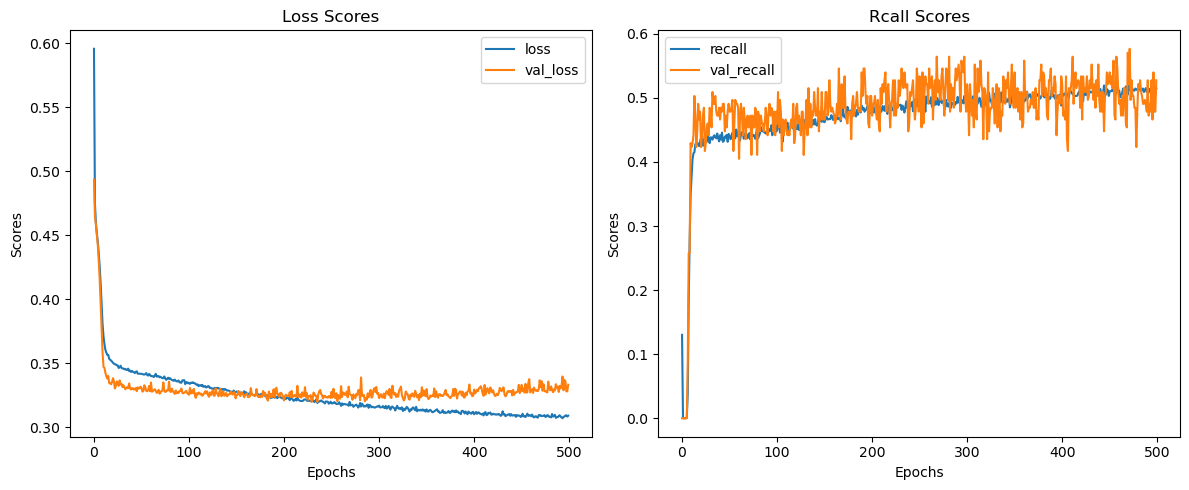

In [114]:
plot_subplots(Vanilla_recall)

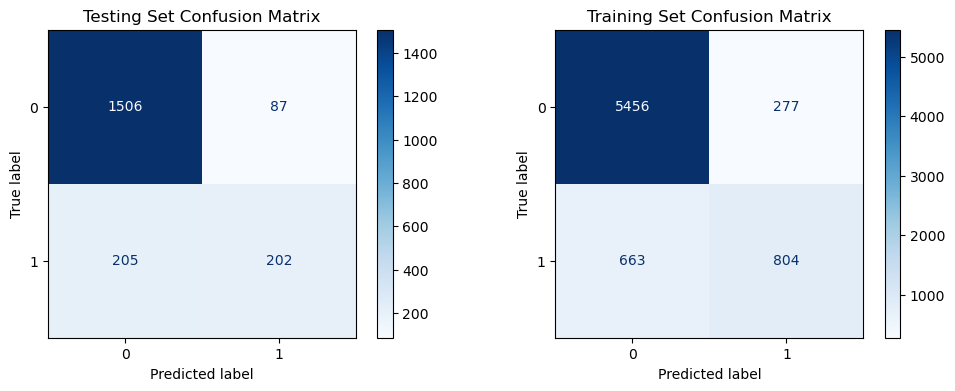


----------------------------- Training -----------------------------


              precision    recall  f1-score   support

           0       0.89      0.95      0.92      5733
           1       0.74      0.55      0.63      1467

    accuracy                           0.87      7200
   macro avg       0.82      0.75      0.78      7200
weighted avg       0.86      0.87      0.86      7200

                        
----------------------------- Testing -----------------------------


              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1593
           1       0.70      0.50      0.58       407

    accuracy                           0.85      2000
   macro avg       0.79      0.72      0.75      2000
weighted avg       0.84      0.85      0.84      2000


----------------------------- ROC -----------------------------




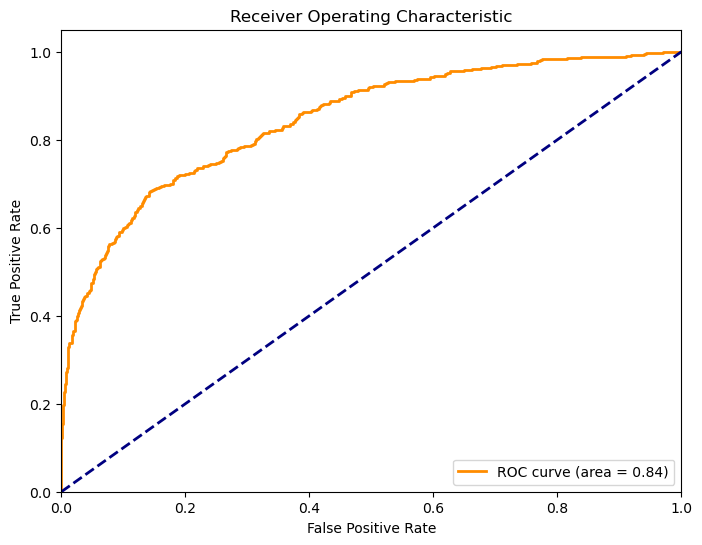

In [100]:
model_Evaluation_results(Vanilla_Model_Recall, x_train, y_train, x_test, y_test)

In [93]:
# It seems like our model is also overfitting, we will see if the next experiments will fix this 

## with class_weigth

Investigate how the "class_weight" hyper-parameter is used in a Neural Network.

### Create The Model

In [79]:
from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights = {0: class_weights[0], 1: class_weights[1]}

In [80]:
class_weights

{0: 0.6279434850863422, 1: 2.4539877300613497}

In [83]:
# From observing the results we noticed that the imbalance between the classes caused bad results for the minority class
# So, the accuracy in this case is not the best indicator for the model's performance, we will focus on the recall
# The reason we focus on the recall because it shows the percentage of correctly classified observations.

Weighted_Model = NsO_Model(Metric="Recall")

In [85]:
Weighted_Model.fit(x = x_train, y = y_train, validation_data=(x_valid,y_valid), batch_size = 64, epochs = 500, class_weight=class_weights)

Epoch 1/500
113/113 [==============================] - 1s 6ms/step - loss: 0.6815 - recall: 0.5855 - val_loss: 0.6496 - val_recall: 0.5706
Epoch 2/500
113/113 [==============================] - 0s 4ms/step - loss: 0.6394 - recall: 0.6135 - val_loss: 0.6233 - val_recall: 0.6012
Epoch 3/500
113/113 [==============================] - 1s 4ms/step - loss: 0.6127 - recall: 0.6503 - val_loss: 0.6093 - val_recall: 0.6503
Epoch 4/500
113/113 [==============================] - 1s 5ms/step - loss: 0.5989 - recall: 0.6796 - val_loss: 0.5759 - val_recall: 0.6442
Epoch 5/500
113/113 [==============================] - 1s 5ms/step - loss: 0.5881 - recall: 0.6858 - val_loss: 0.5484 - val_recall: 0.6258
Epoch 6/500
113/113 [==============================] - 0s 4ms/step - loss: 0.5743 - recall: 0.6960 - val_loss: 0.4936 - val_recall: 0.5521
Epoch 7/500
113/113 [==============================] - 0s 4ms/step - loss: 0.5572 - recall: 0.7117 - val_loss: 0.4665 - val_recall: 0.6135
Epoch 8/500
113/113 [======

113/113 [==============================] - 1s 5ms/step - loss: 0.4576 - recall: 0.7491 - val_loss: 0.4774 - val_recall: 0.7853
Epoch 60/500
113/113 [==============================] - 0s 4ms/step - loss: 0.4549 - recall: 0.7580 - val_loss: 0.4463 - val_recall: 0.7730
Epoch 61/500
113/113 [==============================] - 1s 5ms/step - loss: 0.4542 - recall: 0.7573 - val_loss: 0.3981 - val_recall: 0.7117
Epoch 62/500
113/113 [==============================] - 1s 5ms/step - loss: 0.4531 - recall: 0.7539 - val_loss: 0.4289 - val_recall: 0.7546
Epoch 63/500
113/113 [==============================] - 1s 5ms/step - loss: 0.4523 - recall: 0.7641 - val_loss: 0.4439 - val_recall: 0.7730
Epoch 64/500
113/113 [==============================] - 1s 5ms/step - loss: 0.4516 - recall: 0.7580 - val_loss: 0.4236 - val_recall: 0.7485
Epoch 65/500
113/113 [==============================] - 1s 5ms/step - loss: 0.4540 - recall: 0.7498 - val_loss: 0.3905 - val_recall: 0.7055
Epoch 66/500
113/113 [===========

113/113 [==============================] - 1s 4ms/step - loss: 0.4367 - recall: 0.7730 - val_loss: 0.4457 - val_recall: 0.7239
Epoch 118/500
113/113 [==============================] - 0s 4ms/step - loss: 0.4387 - recall: 0.7716 - val_loss: 0.4486 - val_recall: 0.7301
Epoch 119/500
113/113 [==============================] - 0s 4ms/step - loss: 0.4359 - recall: 0.7825 - val_loss: 0.4081 - val_recall: 0.7055
Epoch 120/500
113/113 [==============================] - 1s 5ms/step - loss: 0.4366 - recall: 0.7689 - val_loss: 0.4020 - val_recall: 0.7117
Epoch 121/500
113/113 [==============================] - 1s 5ms/step - loss: 0.4369 - recall: 0.7812 - val_loss: 0.4250 - val_recall: 0.7178
Epoch 122/500
113/113 [==============================] - 1s 5ms/step - loss: 0.4361 - recall: 0.7805 - val_loss: 0.4143 - val_recall: 0.7117
Epoch 123/500
113/113 [==============================] - 1s 5ms/step - loss: 0.4348 - recall: 0.7819 - val_loss: 0.4053 - val_recall: 0.6933
Epoch 124/500
113/113 [====

113/113 [==============================] - 1s 5ms/step - loss: 0.4294 - recall: 0.7757 - val_loss: 0.4014 - val_recall: 0.6933
Epoch 176/500
113/113 [==============================] - 1s 5ms/step - loss: 0.4274 - recall: 0.7832 - val_loss: 0.4212 - val_recall: 0.7117
Epoch 177/500
113/113 [==============================] - 1s 5ms/step - loss: 0.4307 - recall: 0.7791 - val_loss: 0.4407 - val_recall: 0.7362
Epoch 178/500
113/113 [==============================] - 1s 6ms/step - loss: 0.4295 - recall: 0.7744 - val_loss: 0.4506 - val_recall: 0.7362
Epoch 179/500
113/113 [==============================] - 1s 6ms/step - loss: 0.4289 - recall: 0.7751 - val_loss: 0.4100 - val_recall: 0.6933
Epoch 180/500
113/113 [==============================] - 1s 5ms/step - loss: 0.4289 - recall: 0.7757 - val_loss: 0.4387 - val_recall: 0.7178
Epoch 181/500
113/113 [==============================] - 1s 5ms/step - loss: 0.4290 - recall: 0.7791 - val_loss: 0.4694 - val_recall: 0.7485
Epoch 182/500
113/113 [====

113/113 [==============================] - 1s 5ms/step - loss: 0.4235 - recall: 0.7832 - val_loss: 0.4428 - val_recall: 0.7423
Epoch 234/500
113/113 [==============================] - 1s 5ms/step - loss: 0.4230 - recall: 0.7832 - val_loss: 0.4646 - val_recall: 0.7546
Epoch 235/500
113/113 [==============================] - 1s 6ms/step - loss: 0.4253 - recall: 0.7757 - val_loss: 0.4646 - val_recall: 0.7485
Epoch 236/500
113/113 [==============================] - 1s 5ms/step - loss: 0.4219 - recall: 0.7853 - val_loss: 0.4286 - val_recall: 0.7301
Epoch 237/500
113/113 [==============================] - 1s 5ms/step - loss: 0.4232 - recall: 0.7839 - val_loss: 0.4627 - val_recall: 0.7423
Epoch 238/500
113/113 [==============================] - 1s 4ms/step - loss: 0.4221 - recall: 0.7948 - val_loss: 0.4527 - val_recall: 0.7239
Epoch 239/500
113/113 [==============================] - 1s 6ms/step - loss: 0.4229 - recall: 0.7866 - val_loss: 0.3840 - val_recall: 0.6810
Epoch 240/500
113/113 [====

113/113 [==============================] - 1s 5ms/step - loss: 0.4204 - recall: 0.7873 - val_loss: 0.4473 - val_recall: 0.7239
Epoch 292/500
113/113 [==============================] - 1s 5ms/step - loss: 0.4190 - recall: 0.7819 - val_loss: 0.4721 - val_recall: 0.7546
Epoch 293/500
113/113 [==============================] - 1s 5ms/step - loss: 0.4211 - recall: 0.7825 - val_loss: 0.4501 - val_recall: 0.7362
Epoch 294/500
113/113 [==============================] - 1s 6ms/step - loss: 0.4192 - recall: 0.7894 - val_loss: 0.4248 - val_recall: 0.7178
Epoch 295/500
113/113 [==============================] - 1s 6ms/step - loss: 0.4183 - recall: 0.7805 - val_loss: 0.4747 - val_recall: 0.7607
Epoch 296/500
113/113 [==============================] - 1s 6ms/step - loss: 0.4199 - recall: 0.7921 - val_loss: 0.4972 - val_recall: 0.7730
Epoch 297/500
113/113 [==============================] - 1s 6ms/step - loss: 0.4191 - recall: 0.7825 - val_loss: 0.4524 - val_recall: 0.7301
Epoch 298/500
113/113 [====

113/113 [==============================] - 1s 5ms/step - loss: 0.4174 - recall: 0.7941 - val_loss: 0.4242 - val_recall: 0.7117
Epoch 350/500
113/113 [==============================] - 1s 6ms/step - loss: 0.4149 - recall: 0.7873 - val_loss: 0.4096 - val_recall: 0.7055
Epoch 351/500
113/113 [==============================] - 1s 6ms/step - loss: 0.4179 - recall: 0.7846 - val_loss: 0.4521 - val_recall: 0.7239
Epoch 352/500
113/113 [==============================] - 1s 5ms/step - loss: 0.4158 - recall: 0.7866 - val_loss: 0.4185 - val_recall: 0.7178
Epoch 353/500
113/113 [==============================] - 1s 5ms/step - loss: 0.4154 - recall: 0.7880 - val_loss: 0.4409 - val_recall: 0.7423
Epoch 354/500
113/113 [==============================] - 1s 5ms/step - loss: 0.4175 - recall: 0.7853 - val_loss: 0.4437 - val_recall: 0.7239
Epoch 355/500
113/113 [==============================] - 1s 5ms/step - loss: 0.4163 - recall: 0.7880 - val_loss: 0.4079 - val_recall: 0.6933
Epoch 356/500
113/113 [====

113/113 [==============================] - 1s 6ms/step - loss: 0.4153 - recall: 0.7832 - val_loss: 0.4264 - val_recall: 0.7239
Epoch 408/500
113/113 [==============================] - 1s 6ms/step - loss: 0.4136 - recall: 0.7798 - val_loss: 0.4730 - val_recall: 0.7423
Epoch 409/500
113/113 [==============================] - 1s 5ms/step - loss: 0.4139 - recall: 0.7900 - val_loss: 0.4314 - val_recall: 0.7239
Epoch 410/500
113/113 [==============================] - 1s 5ms/step - loss: 0.4135 - recall: 0.7969 - val_loss: 0.4624 - val_recall: 0.7301
Epoch 411/500
113/113 [==============================] - 1s 5ms/step - loss: 0.4125 - recall: 0.7894 - val_loss: 0.4497 - val_recall: 0.7301
Epoch 412/500
113/113 [==============================] - 1s 4ms/step - loss: 0.4146 - recall: 0.7935 - val_loss: 0.4601 - val_recall: 0.7423
Epoch 413/500
113/113 [==============================] - 1s 5ms/step - loss: 0.4145 - recall: 0.7860 - val_loss: 0.4386 - val_recall: 0.7301
Epoch 414/500
113/113 [====

113/113 [==============================] - 1s 5ms/step - loss: 0.4095 - recall: 0.7853 - val_loss: 0.4118 - val_recall: 0.7117
Epoch 466/500
113/113 [==============================] - 1s 5ms/step - loss: 0.4102 - recall: 0.7907 - val_loss: 0.4356 - val_recall: 0.7239
Epoch 467/500
113/113 [==============================] - 1s 4ms/step - loss: 0.4102 - recall: 0.7860 - val_loss: 0.4396 - val_recall: 0.7423
Epoch 468/500
113/113 [==============================] - 1s 5ms/step - loss: 0.4083 - recall: 0.7948 - val_loss: 0.4250 - val_recall: 0.7117
Epoch 469/500
113/113 [==============================] - 1s 4ms/step - loss: 0.4110 - recall: 0.7948 - val_loss: 0.4380 - val_recall: 0.7301
Epoch 470/500
113/113 [==============================] - 1s 5ms/step - loss: 0.4105 - recall: 0.7873 - val_loss: 0.4743 - val_recall: 0.7546
Epoch 471/500
113/113 [==============================] - 1s 6ms/step - loss: 0.4105 - recall: 0.7948 - val_loss: 0.4404 - val_recall: 0.7423
Epoch 472/500
113/113 [====

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [96]:
Weighted_Recall = pd.DataFrame(Weighted_Model.history.history)
Weighted_Recall.head()

loss    recall  val_loss  val_recall
0  0.681512  0.585549  0.649570    0.570552
1  0.639411  0.613497  0.623281    0.601227
2  0.612699  0.650307  0.609310    0.650307
3  0.598881  0.679618  0.575905    0.644172
4  0.588129  0.685753  0.548382    0.625767

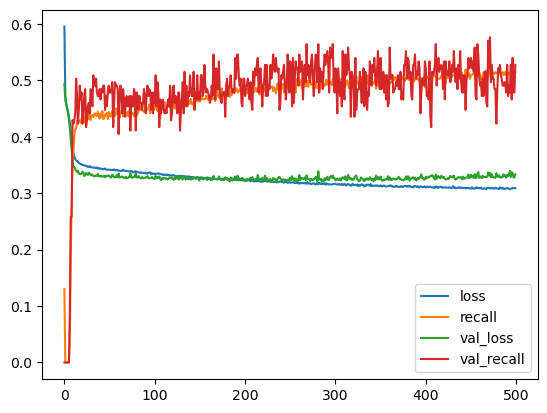

In [97]:
loss_df.plot()
plt.show()

In [ ]:
# We can see that the model starts to slightly to overfit  

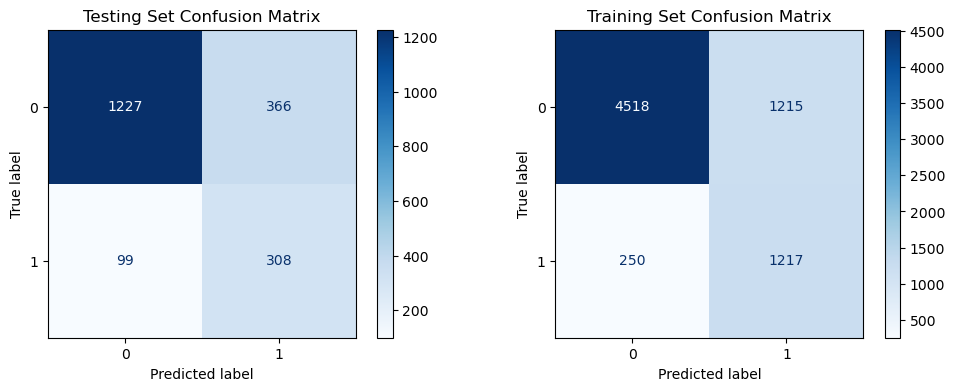


----------------------------- Training -----------------------------


              precision    recall  f1-score   support

           0       0.95      0.79      0.86      5733
           1       0.50      0.83      0.62      1467

    accuracy                           0.80      7200
   macro avg       0.72      0.81      0.74      7200
weighted avg       0.86      0.80      0.81      7200

                        
----------------------------- Testing -----------------------------


              precision    recall  f1-score   support

           0       0.93      0.77      0.84      1593
           1       0.46      0.76      0.57       407

    accuracy                           0.77      2000
   macro avg       0.69      0.76      0.71      2000
weighted avg       0.83      0.77      0.79      2000


----------------------------- ROC -----------------------------




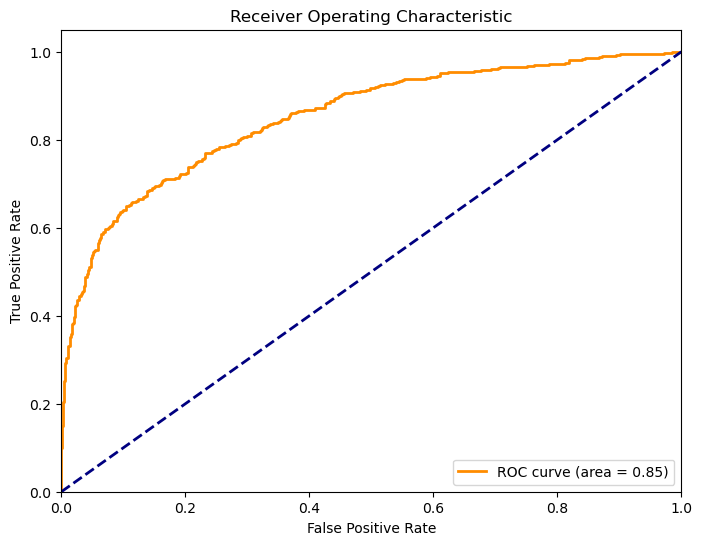

In [98]:
model_Evaluation_results(Weighted_Model, x_train, y_train, x_test, y_test)

## Implementation Different Methods to Develop The Model

- Implement the following methods on model creating with "class_weight" parameter
- Create and evaluate model for each method 

### Increase The Learning Rate and Observe The Results

In [101]:
LR_Model = NsO_Model(Metric="Recall", lr = 0.009) 

In [102]:

LR_Model.fit(x = x_train, y = y_train, validation_data=(x_valid,y_valid), batch_size = 64, epochs = 500, class_weight=class_weights)

Epoch 1/500
113/113 [==============================] - 2s 8ms/step - loss: 0.6815 - recall: 0.5855 - val_loss: 0.6496 - val_recall: 0.5706
Epoch 2/500
113/113 [==============================] - 0s 4ms/step - loss: 0.6394 - recall: 0.6135 - val_loss: 0.6233 - val_recall: 0.6012
Epoch 3/500
113/113 [==============================] - 0s 4ms/step - loss: 0.6127 - recall: 0.6503 - val_loss: 0.6093 - val_recall: 0.6503
Epoch 4/500
113/113 [==============================] - 0s 4ms/step - loss: 0.5989 - recall: 0.6796 - val_loss: 0.5759 - val_recall: 0.6442
Epoch 5/500
113/113 [==============================] - 1s 5ms/step - loss: 0.5881 - recall: 0.6858 - val_loss: 0.5484 - val_recall: 0.6258
Epoch 6/500
113/113 [==============================] - 0s 4ms/step - loss: 0.5743 - recall: 0.6960 - val_loss: 0.4936 - val_recall: 0.5521
Epoch 7/500
113/113 [==============================] - 1s 5ms/step - loss: 0.5572 - recall: 0.7117 - val_loss: 0.4665 - val_recall: 0.6135
Epoch 8/500
113/113 [======

113/113 [==============================] - 1s 5ms/step - loss: 0.4576 - recall: 0.7491 - val_loss: 0.4774 - val_recall: 0.7853
Epoch 60/500
113/113 [==============================] - 0s 4ms/step - loss: 0.4549 - recall: 0.7580 - val_loss: 0.4463 - val_recall: 0.7730
Epoch 61/500
113/113 [==============================] - 0s 4ms/step - loss: 0.4542 - recall: 0.7573 - val_loss: 0.3981 - val_recall: 0.7117
Epoch 62/500
113/113 [==============================] - 1s 4ms/step - loss: 0.4531 - recall: 0.7539 - val_loss: 0.4289 - val_recall: 0.7546
Epoch 63/500
113/113 [==============================] - 1s 5ms/step - loss: 0.4523 - recall: 0.7641 - val_loss: 0.4439 - val_recall: 0.7730
Epoch 64/500
113/113 [==============================] - 1s 5ms/step - loss: 0.4516 - recall: 0.7580 - val_loss: 0.4236 - val_recall: 0.7485
Epoch 65/500
113/113 [==============================] - 1s 5ms/step - loss: 0.4540 - recall: 0.7498 - val_loss: 0.3905 - val_recall: 0.7055
Epoch 66/500
113/113 [===========

113/113 [==============================] - 1s 5ms/step - loss: 0.4367 - recall: 0.7730 - val_loss: 0.4457 - val_recall: 0.7239
Epoch 118/500
113/113 [==============================] - 1s 5ms/step - loss: 0.4387 - recall: 0.7716 - val_loss: 0.4486 - val_recall: 0.7301
Epoch 119/500
113/113 [==============================] - 1s 5ms/step - loss: 0.4359 - recall: 0.7825 - val_loss: 0.4081 - val_recall: 0.7055
Epoch 120/500
113/113 [==============================] - 1s 5ms/step - loss: 0.4366 - recall: 0.7689 - val_loss: 0.4020 - val_recall: 0.7117
Epoch 121/500
113/113 [==============================] - 1s 5ms/step - loss: 0.4369 - recall: 0.7812 - val_loss: 0.4250 - val_recall: 0.7178
Epoch 122/500
113/113 [==============================] - 1s 5ms/step - loss: 0.4361 - recall: 0.7805 - val_loss: 0.4143 - val_recall: 0.7117
Epoch 123/500
113/113 [==============================] - 1s 5ms/step - loss: 0.4348 - recall: 0.7819 - val_loss: 0.4053 - val_recall: 0.6933
Epoch 124/500
113/113 [====

113/113 [==============================] - 1s 5ms/step - loss: 0.4294 - recall: 0.7757 - val_loss: 0.4014 - val_recall: 0.6933
Epoch 176/500
113/113 [==============================] - 1s 5ms/step - loss: 0.4274 - recall: 0.7832 - val_loss: 0.4212 - val_recall: 0.7117
Epoch 177/500
113/113 [==============================] - 1s 5ms/step - loss: 0.4307 - recall: 0.7791 - val_loss: 0.4407 - val_recall: 0.7362
Epoch 178/500
113/113 [==============================] - 1s 5ms/step - loss: 0.4295 - recall: 0.7744 - val_loss: 0.4506 - val_recall: 0.7362
Epoch 179/500
113/113 [==============================] - 1s 5ms/step - loss: 0.4289 - recall: 0.7751 - val_loss: 0.4100 - val_recall: 0.6933
Epoch 180/500
113/113 [==============================] - 1s 5ms/step - loss: 0.4289 - recall: 0.7757 - val_loss: 0.4387 - val_recall: 0.7178
Epoch 181/500
113/113 [==============================] - 1s 5ms/step - loss: 0.4290 - recall: 0.7791 - val_loss: 0.4694 - val_recall: 0.7485
Epoch 182/500
113/113 [====

113/113 [==============================] - 1s 5ms/step - loss: 0.4235 - recall: 0.7832 - val_loss: 0.4428 - val_recall: 0.7423
Epoch 234/500
113/113 [==============================] - 1s 5ms/step - loss: 0.4230 - recall: 0.7832 - val_loss: 0.4646 - val_recall: 0.7546
Epoch 235/500
113/113 [==============================] - 1s 6ms/step - loss: 0.4253 - recall: 0.7757 - val_loss: 0.4646 - val_recall: 0.7485
Epoch 236/500
113/113 [==============================] - 1s 5ms/step - loss: 0.4219 - recall: 0.7853 - val_loss: 0.4286 - val_recall: 0.7301
Epoch 237/500
113/113 [==============================] - 1s 5ms/step - loss: 0.4232 - recall: 0.7839 - val_loss: 0.4627 - val_recall: 0.7423
Epoch 238/500
113/113 [==============================] - 1s 6ms/step - loss: 0.4221 - recall: 0.7948 - val_loss: 0.4527 - val_recall: 0.7239
Epoch 239/500
113/113 [==============================] - 1s 6ms/step - loss: 0.4229 - recall: 0.7866 - val_loss: 0.3840 - val_recall: 0.6810
Epoch 240/500
113/113 [====

113/113 [==============================] - 1s 6ms/step - loss: 0.4204 - recall: 0.7873 - val_loss: 0.4473 - val_recall: 0.7239
Epoch 292/500
113/113 [==============================] - 1s 5ms/step - loss: 0.4190 - recall: 0.7819 - val_loss: 0.4721 - val_recall: 0.7546
Epoch 293/500
113/113 [==============================] - 1s 5ms/step - loss: 0.4211 - recall: 0.7825 - val_loss: 0.4501 - val_recall: 0.7362
Epoch 294/500
113/113 [==============================] - 1s 5ms/step - loss: 0.4192 - recall: 0.7894 - val_loss: 0.4248 - val_recall: 0.7178
Epoch 295/500
113/113 [==============================] - 1s 5ms/step - loss: 0.4183 - recall: 0.7805 - val_loss: 0.4747 - val_recall: 0.7607
Epoch 296/500
113/113 [==============================] - 1s 5ms/step - loss: 0.4199 - recall: 0.7921 - val_loss: 0.4972 - val_recall: 0.7730
Epoch 297/500
113/113 [==============================] - 1s 5ms/step - loss: 0.4191 - recall: 0.7825 - val_loss: 0.4524 - val_recall: 0.7301
Epoch 298/500
113/113 [====

113/113 [==============================] - 1s 5ms/step - loss: 0.4174 - recall: 0.7941 - val_loss: 0.4242 - val_recall: 0.7117
Epoch 350/500
113/113 [==============================] - 1s 5ms/step - loss: 0.4149 - recall: 0.7873 - val_loss: 0.4096 - val_recall: 0.7055
Epoch 351/500
113/113 [==============================] - 1s 5ms/step - loss: 0.4179 - recall: 0.7846 - val_loss: 0.4521 - val_recall: 0.7239
Epoch 352/500
113/113 [==============================] - 1s 5ms/step - loss: 0.4158 - recall: 0.7866 - val_loss: 0.4185 - val_recall: 0.7178
Epoch 353/500
113/113 [==============================] - 1s 6ms/step - loss: 0.4154 - recall: 0.7880 - val_loss: 0.4409 - val_recall: 0.7423
Epoch 354/500
113/113 [==============================] - 1s 5ms/step - loss: 0.4175 - recall: 0.7853 - val_loss: 0.4437 - val_recall: 0.7239
Epoch 355/500
113/113 [==============================] - 1s 5ms/step - loss: 0.4163 - recall: 0.7880 - val_loss: 0.4079 - val_recall: 0.6933
Epoch 356/500
113/113 [====

113/113 [==============================] - 1s 6ms/step - loss: 0.4153 - recall: 0.7832 - val_loss: 0.4264 - val_recall: 0.7239
Epoch 408/500
113/113 [==============================] - 1s 5ms/step - loss: 0.4136 - recall: 0.7798 - val_loss: 0.4730 - val_recall: 0.7423
Epoch 409/500
113/113 [==============================] - 1s 5ms/step - loss: 0.4139 - recall: 0.7900 - val_loss: 0.4314 - val_recall: 0.7239
Epoch 410/500
113/113 [==============================] - 1s 5ms/step - loss: 0.4135 - recall: 0.7969 - val_loss: 0.4624 - val_recall: 0.7301
Epoch 411/500
113/113 [==============================] - 1s 5ms/step - loss: 0.4125 - recall: 0.7894 - val_loss: 0.4497 - val_recall: 0.7301
Epoch 412/500
113/113 [==============================] - 1s 5ms/step - loss: 0.4146 - recall: 0.7935 - val_loss: 0.4601 - val_recall: 0.7423
Epoch 413/500
113/113 [==============================] - 1s 5ms/step - loss: 0.4145 - recall: 0.7860 - val_loss: 0.4386 - val_recall: 0.7301
Epoch 414/500
113/113 [====

113/113 [==============================] - 0s 4ms/step - loss: 0.4095 - recall: 0.7853 - val_loss: 0.4118 - val_recall: 0.7117
Epoch 466/500
113/113 [==============================] - 1s 5ms/step - loss: 0.4102 - recall: 0.7907 - val_loss: 0.4356 - val_recall: 0.7239
Epoch 467/500
113/113 [==============================] - 1s 5ms/step - loss: 0.4102 - recall: 0.7860 - val_loss: 0.4396 - val_recall: 0.7423
Epoch 468/500
113/113 [==============================] - 1s 5ms/step - loss: 0.4083 - recall: 0.7948 - val_loss: 0.4250 - val_recall: 0.7117
Epoch 469/500
113/113 [==============================] - 1s 5ms/step - loss: 0.4110 - recall: 0.7948 - val_loss: 0.4380 - val_recall: 0.7301
Epoch 470/500
113/113 [==============================] - 1s 5ms/step - loss: 0.4105 - recall: 0.7873 - val_loss: 0.4743 - val_recall: 0.7546
Epoch 471/500
113/113 [==============================] - 1s 6ms/step - loss: 0.4105 - recall: 0.7948 - val_loss: 0.4404 - val_recall: 0.7423
Epoch 472/500
113/113 [====

In [103]:
LR_Recall = pd.DataFrame(LR_Model.history.history)
LR_Recall.head()

loss    recall  val_loss  val_recall
0  0.681512  0.585549  0.649570    0.570552
1  0.639411  0.613497  0.623281    0.601227
2  0.612699  0.650307  0.609310    0.650307
3  0.598881  0.679618  0.575905    0.644172
4  0.588129  0.685753  0.548382    0.625767

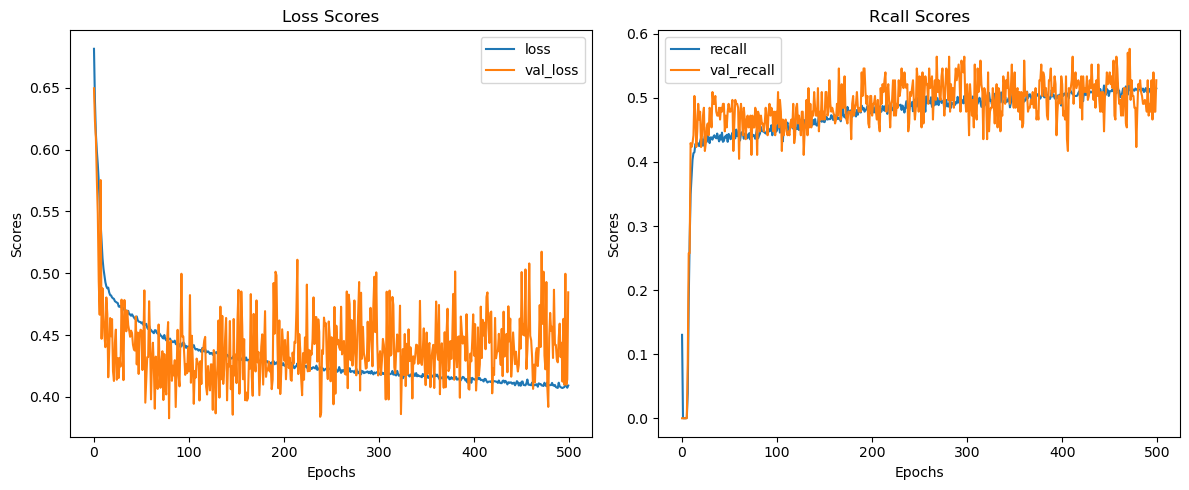

In [115]:
plot_subplots(LR_Recall)

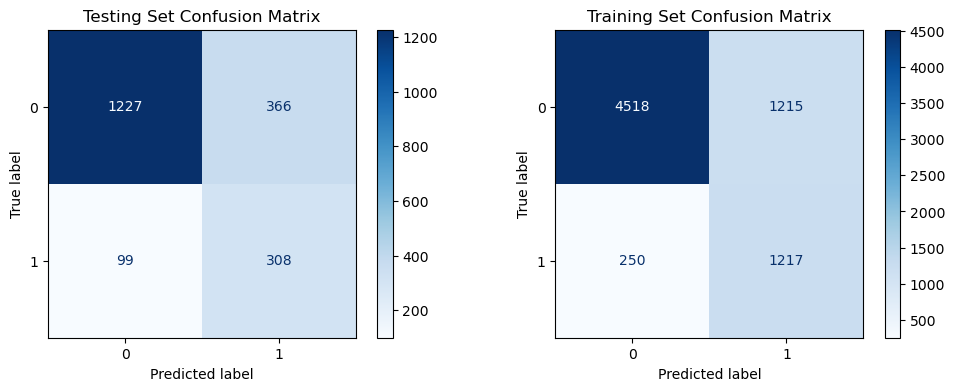


----------------------------- Training -----------------------------


              precision    recall  f1-score   support

           0       0.95      0.79      0.86      5733
           1       0.50      0.83      0.62      1467

    accuracy                           0.80      7200
   macro avg       0.72      0.81      0.74      7200
weighted avg       0.86      0.80      0.81      7200

                        
----------------------------- Testing -----------------------------


              precision    recall  f1-score   support

           0       0.93      0.77      0.84      1593
           1       0.46      0.76      0.57       407

    accuracy                           0.77      2000
   macro avg       0.69      0.76      0.71      2000
weighted avg       0.83      0.77      0.79      2000


----------------------------- ROC -----------------------------




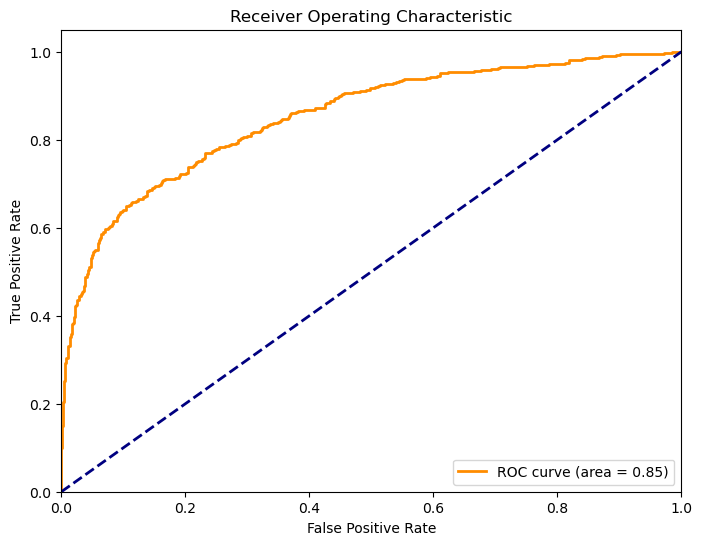

In [165]:
model_Evaluation_results(LR_Model, x_train, y_train, x_test, y_test)

### Add Dropout Layer

In [106]:
from tensorflow.keras.layers import Dropout

In [108]:
SEED = 42
import os
import random
os.environ["TF_DETERMINISTIC_OPS"] = "1"
os.environ['PYTHONHASHSEED']=str(SEED)
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

  
DropOut_Model = Sequential()

DropOut_Model.add(Dense(20, activation="relu", input_dim=x_train.shape[1]))
DropOut_Model.add(Dropout(0.2))

DropOut_Model.add(Dense(16, activation="relu"))
DropOut_Model.add(Dropout(0.2))

DropOut_Model.add(Dense(4, activation="relu"))
DropOut_Model.add(Dropout(0.2))

DropOut_Model.add(Dense(1, activation="sigmoid"))

opt = Adam(learning_rate=0.001)
DropOut_Model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["Recall"])

In [110]:
DropOut_Model.fit(x = x_train, y = y_train, validation_data=(x_valid,y_valid), batch_size = 64, epochs = 500, class_weight=class_weights)

Epoch 1/500
113/113 [==============================] - 2s 8ms/step - loss: 0.6884 - recall: 0.5781 - val_loss: 0.6656 - val_recall: 0.5521
Epoch 2/500
113/113 [==============================] - 1s 5ms/step - loss: 0.6713 - recall: 0.5890 - val_loss: 0.6561 - val_recall: 0.6564
Epoch 3/500
113/113 [==============================] - 1s 5ms/step - loss: 0.6492 - recall: 0.6135 - val_loss: 0.6390 - val_recall: 0.6626
Epoch 4/500
113/113 [==============================] - 1s 5ms/step - loss: 0.6471 - recall: 0.5930 - val_loss: 0.6369 - val_recall: 0.6687
Epoch 5/500
113/113 [==============================] - 1s 5ms/step - loss: 0.6388 - recall: 0.6244 - val_loss: 0.6237 - val_recall: 0.6810
Epoch 6/500
113/113 [==============================] - 1s 6ms/step - loss: 0.6285 - recall: 0.6162 - val_loss: 0.6048 - val_recall: 0.6687
Epoch 7/500
113/113 [==============================] - 1s 5ms/step - loss: 0.6256 - recall: 0.6551 - val_loss: 0.5958 - val_recall: 0.6933
Epoch 8/500
113/113 [======

113/113 [==============================] - 1s 5ms/step - loss: 0.5077 - recall: 0.7069 - val_loss: 0.4560 - val_recall: 0.7791
Epoch 60/500
113/113 [==============================] - 1s 6ms/step - loss: 0.5087 - recall: 0.7062 - val_loss: 0.4315 - val_recall: 0.7362
Epoch 61/500
113/113 [==============================] - 1s 5ms/step - loss: 0.5031 - recall: 0.7198 - val_loss: 0.4582 - val_recall: 0.8037
Epoch 62/500
113/113 [==============================] - 1s 5ms/step - loss: 0.5092 - recall: 0.7151 - val_loss: 0.4447 - val_recall: 0.7730
Epoch 63/500
113/113 [==============================] - 1s 6ms/step - loss: 0.5072 - recall: 0.7185 - val_loss: 0.4458 - val_recall: 0.7791
Epoch 64/500
113/113 [==============================] - 1s 6ms/step - loss: 0.5100 - recall: 0.7082 - val_loss: 0.4613 - val_recall: 0.8037
Epoch 65/500
113/113 [==============================] - 1s 6ms/step - loss: 0.5053 - recall: 0.7253 - val_loss: 0.4389 - val_recall: 0.7362
Epoch 66/500
113/113 [===========

113/113 [==============================] - 1s 6ms/step - loss: 0.4870 - recall: 0.7498 - val_loss: 0.4413 - val_recall: 0.7730
Epoch 118/500
113/113 [==============================] - 1s 6ms/step - loss: 0.4862 - recall: 0.7526 - val_loss: 0.4263 - val_recall: 0.7607
Epoch 119/500
113/113 [==============================] - 1s 7ms/step - loss: 0.4989 - recall: 0.7348 - val_loss: 0.4437 - val_recall: 0.7791
Epoch 120/500
113/113 [==============================] - 1s 6ms/step - loss: 0.4916 - recall: 0.7478 - val_loss: 0.4435 - val_recall: 0.7914
Epoch 121/500
113/113 [==============================] - 1s 5ms/step - loss: 0.4989 - recall: 0.7260 - val_loss: 0.4364 - val_recall: 0.7607
Epoch 122/500
113/113 [==============================] - 1s 5ms/step - loss: 0.4984 - recall: 0.7498 - val_loss: 0.4226 - val_recall: 0.7546
Epoch 123/500
113/113 [==============================] - 1s 6ms/step - loss: 0.4888 - recall: 0.7430 - val_loss: 0.4333 - val_recall: 0.7730
Epoch 124/500
113/113 [====

113/113 [==============================] - 1s 5ms/step - loss: 0.4900 - recall: 0.7601 - val_loss: 0.4304 - val_recall: 0.7546
Epoch 176/500
113/113 [==============================] - 1s 5ms/step - loss: 0.4947 - recall: 0.7423 - val_loss: 0.4320 - val_recall: 0.7546
Epoch 177/500
113/113 [==============================] - 1s 5ms/step - loss: 0.4849 - recall: 0.7587 - val_loss: 0.4211 - val_recall: 0.7485
Epoch 178/500
113/113 [==============================] - 1s 5ms/step - loss: 0.4966 - recall: 0.7410 - val_loss: 0.4456 - val_recall: 0.7669
Epoch 179/500
113/113 [==============================] - 1s 6ms/step - loss: 0.4889 - recall: 0.7580 - val_loss: 0.4378 - val_recall: 0.7853
Epoch 180/500
113/113 [==============================] - 1s 5ms/step - loss: 0.4891 - recall: 0.7532 - val_loss: 0.4365 - val_recall: 0.7607
Epoch 181/500
113/113 [==============================] - 1s 5ms/step - loss: 0.4911 - recall: 0.7389 - val_loss: 0.4401 - val_recall: 0.7423
Epoch 182/500
113/113 [====

113/113 [==============================] - 1s 5ms/step - loss: 0.4861 - recall: 0.7389 - val_loss: 0.4219 - val_recall: 0.7362
Epoch 234/500
113/113 [==============================] - 1s 5ms/step - loss: 0.4860 - recall: 0.7451 - val_loss: 0.4326 - val_recall: 0.7485
Epoch 235/500
113/113 [==============================] - 1s 5ms/step - loss: 0.4851 - recall: 0.7519 - val_loss: 0.4212 - val_recall: 0.7423
Epoch 236/500
113/113 [==============================] - 1s 6ms/step - loss: 0.4833 - recall: 0.7382 - val_loss: 0.4223 - val_recall: 0.7546
Epoch 237/500
113/113 [==============================] - 1s 5ms/step - loss: 0.4811 - recall: 0.7730 - val_loss: 0.4278 - val_recall: 0.7485
Epoch 238/500
113/113 [==============================] - 1s 5ms/step - loss: 0.4824 - recall: 0.7519 - val_loss: 0.4181 - val_recall: 0.7301
Epoch 239/500
113/113 [==============================] - 1s 6ms/step - loss: 0.4851 - recall: 0.7648 - val_loss: 0.4170 - val_recall: 0.7239
Epoch 240/500
113/113 [====

113/113 [==============================] - 1s 6ms/step - loss: 0.4835 - recall: 0.7457 - val_loss: 0.4227 - val_recall: 0.7362
Epoch 292/500
113/113 [==============================] - 1s 6ms/step - loss: 0.4844 - recall: 0.7553 - val_loss: 0.4385 - val_recall: 0.7607
Epoch 293/500
113/113 [==============================] - 1s 5ms/step - loss: 0.4813 - recall: 0.7560 - val_loss: 0.4220 - val_recall: 0.7423
Epoch 294/500
113/113 [==============================] - 1s 5ms/step - loss: 0.4850 - recall: 0.7321 - val_loss: 0.4299 - val_recall: 0.7485
Epoch 295/500
113/113 [==============================] - 1s 5ms/step - loss: 0.4751 - recall: 0.7546 - val_loss: 0.4224 - val_recall: 0.7485
Epoch 296/500
113/113 [==============================] - 1s 5ms/step - loss: 0.4790 - recall: 0.7539 - val_loss: 0.4377 - val_recall: 0.7546
Epoch 297/500
113/113 [==============================] - 1s 6ms/step - loss: 0.4797 - recall: 0.7587 - val_loss: 0.4309 - val_recall: 0.7362
Epoch 298/500
113/113 [====

113/113 [==============================] - 1s 6ms/step - loss: 0.4805 - recall: 0.7641 - val_loss: 0.4187 - val_recall: 0.7301
Epoch 350/500
113/113 [==============================] - 1s 6ms/step - loss: 0.4816 - recall: 0.7376 - val_loss: 0.4188 - val_recall: 0.7362
Epoch 351/500
113/113 [==============================] - 1s 6ms/step - loss: 0.4766 - recall: 0.7696 - val_loss: 0.4133 - val_recall: 0.7362
Epoch 352/500
113/113 [==============================] - 1s 6ms/step - loss: 0.4748 - recall: 0.7376 - val_loss: 0.4137 - val_recall: 0.7301
Epoch 353/500
113/113 [==============================] - 1s 6ms/step - loss: 0.4741 - recall: 0.7485 - val_loss: 0.4277 - val_recall: 0.7362
Epoch 354/500
113/113 [==============================] - 1s 5ms/step - loss: 0.4856 - recall: 0.7321 - val_loss: 0.4304 - val_recall: 0.7301
Epoch 355/500
113/113 [==============================] - 1s 5ms/step - loss: 0.4841 - recall: 0.7566 - val_loss: 0.4486 - val_recall: 0.7607
Epoch 356/500
113/113 [====

113/113 [==============================] - 1s 5ms/step - loss: 0.4679 - recall: 0.7621 - val_loss: 0.4042 - val_recall: 0.7485
Epoch 408/500
113/113 [==============================] - 1s 6ms/step - loss: 0.4731 - recall: 0.7505 - val_loss: 0.4259 - val_recall: 0.7546
Epoch 409/500
113/113 [==============================] - 1s 5ms/step - loss: 0.4781 - recall: 0.7566 - val_loss: 0.4238 - val_recall: 0.7607
Epoch 410/500
113/113 [==============================] - 1s 5ms/step - loss: 0.4675 - recall: 0.7566 - val_loss: 0.4209 - val_recall: 0.7485
Epoch 411/500
113/113 [==============================] - 1s 5ms/step - loss: 0.4820 - recall: 0.7594 - val_loss: 0.4125 - val_recall: 0.7485
Epoch 412/500
113/113 [==============================] - 1s 5ms/step - loss: 0.4783 - recall: 0.7485 - val_loss: 0.4281 - val_recall: 0.7607
Epoch 413/500
113/113 [==============================] - 1s 5ms/step - loss: 0.4744 - recall: 0.7614 - val_loss: 0.4209 - val_recall: 0.7546
Epoch 414/500
113/113 [====

113/113 [==============================] - 1s 6ms/step - loss: 0.4755 - recall: 0.7723 - val_loss: 0.4317 - val_recall: 0.7423
Epoch 466/500
113/113 [==============================] - 1s 5ms/step - loss: 0.4752 - recall: 0.7710 - val_loss: 0.4377 - val_recall: 0.7423
Epoch 467/500
113/113 [==============================] - 1s 5ms/step - loss: 0.4755 - recall: 0.7519 - val_loss: 0.4277 - val_recall: 0.7423
Epoch 468/500
113/113 [==============================] - 1s 6ms/step - loss: 0.4714 - recall: 0.7723 - val_loss: 0.4389 - val_recall: 0.7853
Epoch 469/500
113/113 [==============================] - 1s 6ms/step - loss: 0.4770 - recall: 0.7689 - val_loss: 0.4219 - val_recall: 0.7423
Epoch 470/500
113/113 [==============================] - 1s 5ms/step - loss: 0.4776 - recall: 0.7512 - val_loss: 0.4302 - val_recall: 0.7362
Epoch 471/500
113/113 [==============================] - 1s 5ms/step - loss: 0.4781 - recall: 0.7376 - val_loss: 0.4317 - val_recall: 0.7423
Epoch 472/500
113/113 [====

In [111]:
DropOut_Recall = pd.DataFrame(DropOut_Model.history.history)
DropOut_Recall.head()

loss    recall  val_loss  val_recall
0  0.688441  0.578050  0.665630    0.552147
1  0.671274  0.588957  0.656056    0.656442
2  0.649185  0.613497  0.639032    0.662577
3  0.647142  0.593047  0.636850    0.668712
4  0.638835  0.624404  0.623696    0.680982

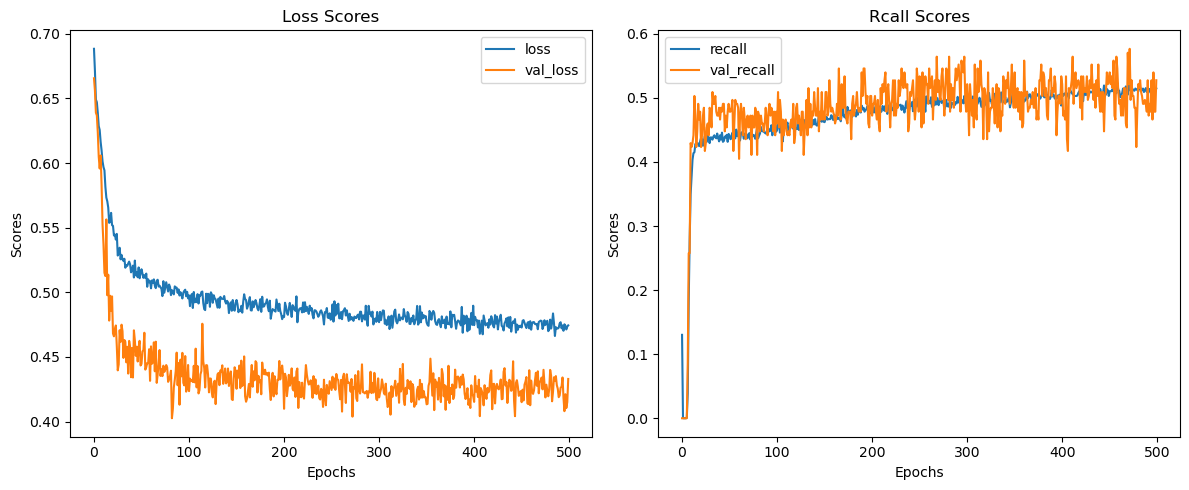

In [116]:
plot_subplots(DropOut_Recall)

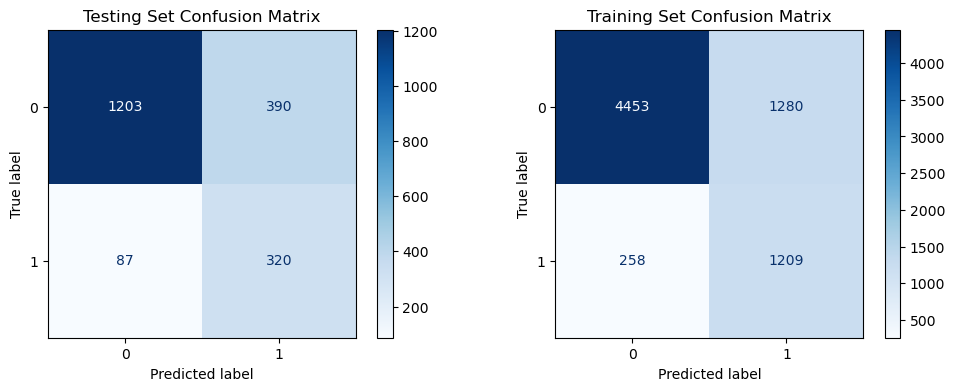


----------------------------- Training -----------------------------


              precision    recall  f1-score   support

           0       0.95      0.78      0.85      5733
           1       0.49      0.82      0.61      1467

    accuracy                           0.79      7200
   macro avg       0.72      0.80      0.73      7200
weighted avg       0.85      0.79      0.80      7200

                        
----------------------------- Testing -----------------------------


              precision    recall  f1-score   support

           0       0.93      0.76      0.83      1593
           1       0.45      0.79      0.57       407

    accuracy                           0.76      2000
   macro avg       0.69      0.77      0.70      2000
weighted avg       0.83      0.76      0.78      2000


----------------------------- ROC -----------------------------




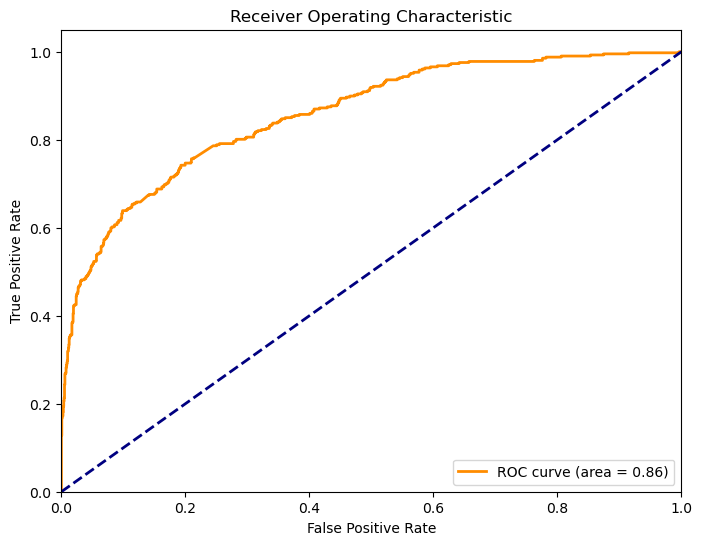

In [117]:
model_Evaluation_results(DropOut_Model, x_train, y_train, x_test, y_test)

### Add Early Stop

#### Monitor the "val_loss" as metric

In [144]:


from tensorflow.keras.callbacks import EarlyStopping
SEED = 42
import os
import random
os.environ["TF_DETERMINISTIC_OPS"] = "1"
os.environ['PYTHONHASHSEED']=str(SEED)
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

  
EarlyS_Model = Sequential()
EarlyS_Model.add(Dense(20, activation="relu", input_dim=x_train.shape[1]))
EarlyS_Model.add(Dense(16, activation="relu"))
EarlyS_Model.add(Dense(4, activation="relu"))
EarlyS_Model.add(Dense(1, activation="sigmoid"))

opt = Adam(learning_rate=0.001)
EarlyS_Model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["Recall"])

In [146]:
early_stop = EarlyStopping(
    monitor="val_loss", mode="min", verbose=1, patience=25, restore_best_weights=True)

In [147]:
EarlyS_Model.fit(
    x=x_train,
    y=y_train,
    validation_data=(x_valid,y_valid),
    batch_size=64,
    epochs=500,
    verbose=1,
    callbacks=[early_stop], class_weight=class_weights
)

Epoch 1/500
113/113 [==============================] - 1s 7ms/step - loss: 0.6815 - recall: 0.5855 - val_loss: 0.6496 - val_recall: 0.5706
Epoch 2/500
113/113 [==============================] - 1s 5ms/step - loss: 0.6394 - recall: 0.6135 - val_loss: 0.6233 - val_recall: 0.6012
Epoch 3/500
113/113 [==============================] - 1s 5ms/step - loss: 0.6127 - recall: 0.6503 - val_loss: 0.6093 - val_recall: 0.6503
Epoch 4/500
113/113 [==============================] - 1s 5ms/step - loss: 0.5989 - recall: 0.6796 - val_loss: 0.5759 - val_recall: 0.6442
Epoch 5/500
113/113 [==============================] - 1s 5ms/step - loss: 0.5881 - recall: 0.6858 - val_loss: 0.5484 - val_recall: 0.6258
Epoch 6/500
113/113 [==============================] - 1s 5ms/step - loss: 0.5743 - recall: 0.6960 - val_loss: 0.4936 - val_recall: 0.5521
Epoch 7/500
113/113 [==============================] - 1s 5ms/step - loss: 0.5572 - recall: 0.7117 - val_loss: 0.4665 - val_recall: 0.6135
Epoch 8/500
113/113 [======

In [148]:
# Showing the first 20 values to avoid confusion  
EarlyS_History = pd.DataFrame(EarlyS_Model.history.history)
EarlyS_History.head(20)


loss    recall  val_loss  val_recall
0   0.681512  0.585549  0.649570    0.570552
1   0.639411  0.613497  0.623281    0.601227
2   0.612699  0.650307  0.609310    0.650307
3   0.598881  0.679618  0.575905    0.644172
4   0.588129  0.685753  0.548382    0.625767
5   0.574259  0.695978  0.493596    0.552147
6   0.557236  0.711656  0.466499    0.613497
7   0.540128  0.714383  0.575372    0.754601
8   0.525813  0.728016  0.447048    0.662577
9   0.511910  0.738241  0.487846    0.723926
10  0.503611  0.743013  0.465813    0.730061
11  0.497836  0.747785  0.449536    0.699386
12  0.492735  0.745740  0.440255    0.717791
13  0.489505  0.748466  0.480469    0.760736
14  0.487835  0.749830  0.467020    0.742331
15  0.488407  0.757328  0.415929    0.705521
16  0.484505  0.752556  0.436961    0.730061
17  0.482387  0.754601  0.463825    0.760736
18  0.482109  0.739605  0.449081    0.736196
19  0.480485  0.753920  0.462938    0.760736

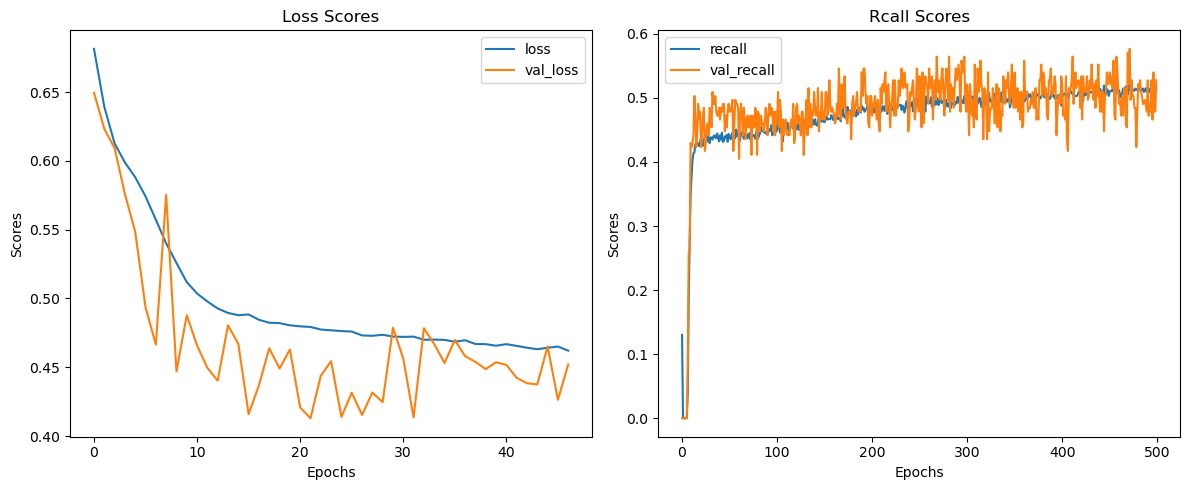

In [149]:
plot_subplots(EarlyS_History)

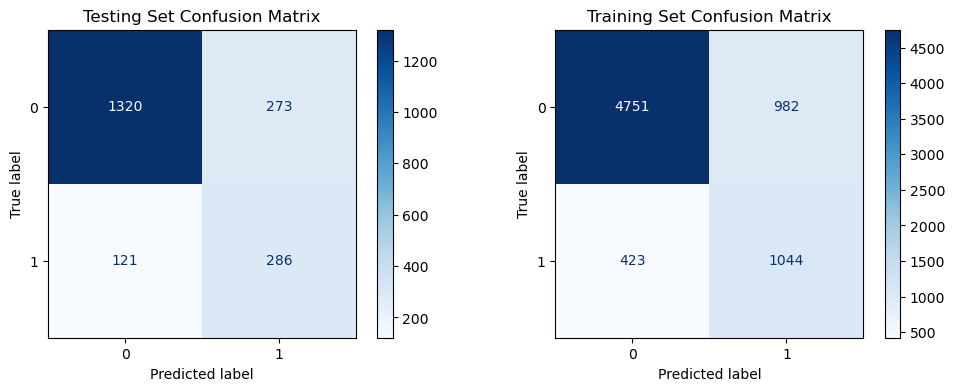


----------------------------- Training -----------------------------


              precision    recall  f1-score   support

           0       0.92      0.83      0.87      5733
           1       0.52      0.71      0.60      1467

    accuracy                           0.80      7200
   macro avg       0.72      0.77      0.73      7200
weighted avg       0.84      0.80      0.82      7200

                        
----------------------------- Testing -----------------------------


              precision    recall  f1-score   support

           0       0.92      0.83      0.87      1593
           1       0.51      0.70      0.59       407

    accuracy                           0.80      2000
   macro avg       0.71      0.77      0.73      2000
weighted avg       0.83      0.80      0.81      2000


----------------------------- ROC -----------------------------




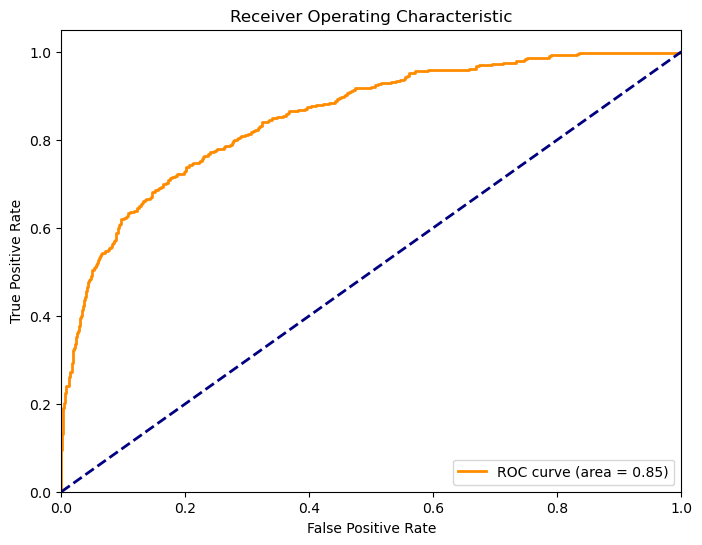

In [150]:
model_Evaluation_results(EarlyS_Model, x_train, y_train, x_test, y_test)

#### Monitor the "val_recall" as metric

In [158]:


from tensorflow.keras.callbacks import EarlyStopping
SEED = 42
import os
import random
os.environ["TF_DETERMINISTIC_OPS"] = "1"
os.environ['PYTHONHASHSEED']=str(SEED)
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)
  
EarlyS_R_Model = Sequential()
EarlyS_R_Model.add(Dense(20, activation="relu", input_dim=x_train.shape[1]))
EarlyS_R_Model.add(Dense(16, activation="relu"))
EarlyS_R_Model.add(Dense(4, activation="relu"))
EarlyS_R_Model.add(Dense(1, activation="sigmoid"))
opt = Adam(learning_rate=0.001)
EarlyS_R_Model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["Recall"])

In [159]:
early_stop = EarlyStopping(
    monitor="val_recall", mode="max", verbose=1, patience=25, restore_best_weights=True
)

In [160]:
EarlyS_R_Model.fit(
    x=x_train,
    y=y_train,
    validation_data= (x_valid,y_valid),
    batch_size=64,
    epochs=500,
    verbose=1,
    callbacks=[early_stop], class_weight=class_weights
)

Epoch 1/500
113/113 [==============================] - 1s 8ms/step - loss: 0.6815 - recall: 0.5855 - val_loss: 0.6496 - val_recall: 0.5706
Epoch 2/500
113/113 [==============================] - 1s 5ms/step - loss: 0.6394 - recall: 0.6135 - val_loss: 0.6233 - val_recall: 0.6012
Epoch 3/500
113/113 [==============================] - 1s 4ms/step - loss: 0.6127 - recall: 0.6503 - val_loss: 0.6093 - val_recall: 0.6503
Epoch 4/500
113/113 [==============================] - 1s 5ms/step - loss: 0.5989 - recall: 0.6796 - val_loss: 0.5759 - val_recall: 0.6442
Epoch 5/500
113/113 [==============================] - 1s 4ms/step - loss: 0.5881 - recall: 0.6858 - val_loss: 0.5484 - val_recall: 0.6258
Epoch 6/500
113/113 [==============================] - 1s 5ms/step - loss: 0.5743 - recall: 0.6960 - val_loss: 0.4936 - val_recall: 0.5521
Epoch 7/500
113/113 [==============================] - 0s 4ms/step - loss: 0.5572 - recall: 0.7117 - val_loss: 0.4665 - val_recall: 0.6135
Epoch 8/500
113/113 [======

113/113 [==============================] - 1s 5ms/step - loss: 0.4576 - recall: 0.7491 - val_loss: 0.4774 - val_recall: 0.7853
Epoch 60/500
113/113 [==============================] - 1s 5ms/step - loss: 0.4549 - recall: 0.7580 - val_loss: 0.4463 - val_recall: 0.7730
Epoch 61/500
113/113 [==============================] - 0s 4ms/step - loss: 0.4542 - recall: 0.7573 - val_loss: 0.3981 - val_recall: 0.7117
Epoch 62/500
113/113 [==============================] - 1s 5ms/step - loss: 0.4531 - recall: 0.7539 - val_loss: 0.4289 - val_recall: 0.7546
Epoch 63/500
113/113 [==============================] - 1s 5ms/step - loss: 0.4523 - recall: 0.7641 - val_loss: 0.4439 - val_recall: 0.7730
Epoch 64/500
113/113 [==============================] - 1s 4ms/step - loss: 0.4516 - recall: 0.7580 - val_loss: 0.4236 - val_recall: 0.7485
Epoch 65/500
113/113 [==============================] - 1s 6ms/step - loss: 0.4540 - recall: 0.7498 - val_loss: 0.3905 - val_recall: 0.7055
Epoch 66/500
113/113 [===========

In [162]:
EarlyS_R_History = pd.DataFrame(EarlyS_R_Model.history.history)
EarlyS_R_History.head()

loss    recall  val_loss  val_recall
0  0.681512  0.585549  0.649570    0.570552
1  0.639411  0.613497  0.623281    0.601227
2  0.612699  0.650307  0.609310    0.650307
3  0.598881  0.679618  0.575905    0.644172
4  0.588129  0.685753  0.548382    0.625767

<AxesSubplot:>

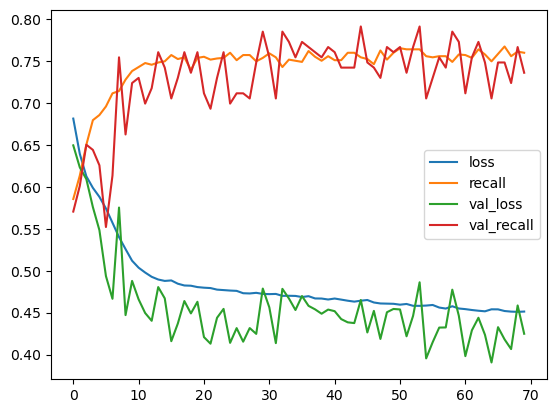

In [163]:
EarlyS_R_History.plot()

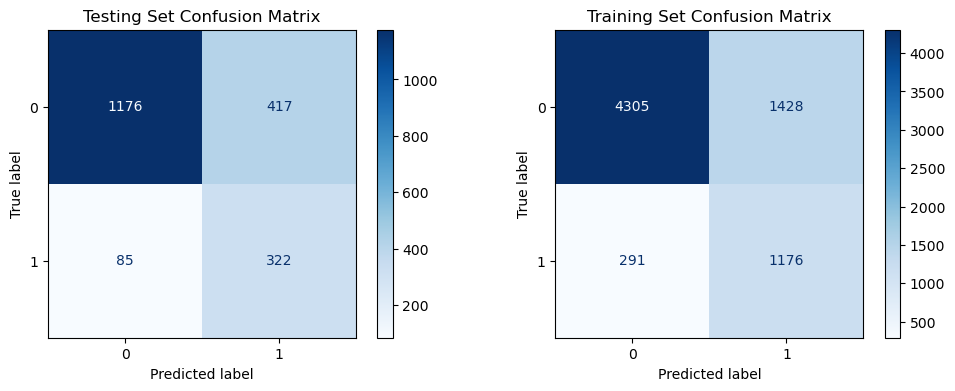


----------------------------- Training -----------------------------


              precision    recall  f1-score   support

           0       0.94      0.75      0.83      5733
           1       0.45      0.80      0.58      1467

    accuracy                           0.76      7200
   macro avg       0.69      0.78      0.71      7200
weighted avg       0.84      0.76      0.78      7200

                        
----------------------------- Testing -----------------------------


              precision    recall  f1-score   support

           0       0.93      0.74      0.82      1593
           1       0.44      0.79      0.56       407

    accuracy                           0.75      2000
   macro avg       0.68      0.76      0.69      2000
weighted avg       0.83      0.75      0.77      2000


----------------------------- ROC -----------------------------




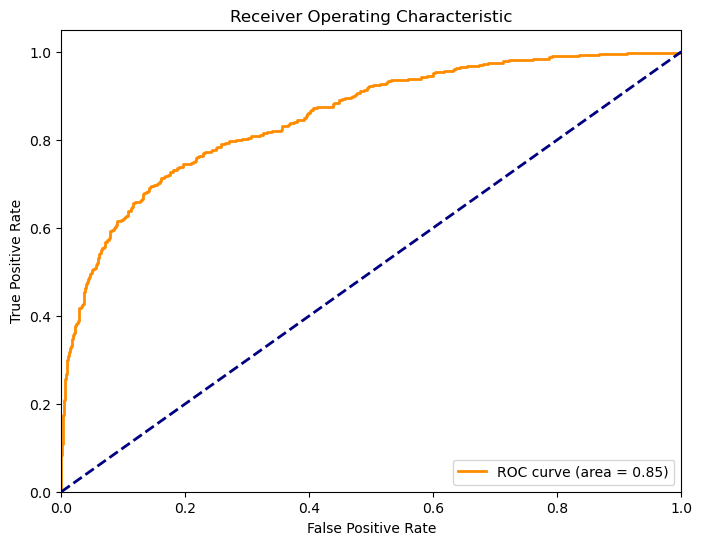

In [164]:
model_Evaluation_results(EarlyS_R_Model, x_train, y_train, x_test, y_test)

## Optuna

In [172]:
import optuna

In [203]:
# we are monitoring the val_recall because we know it's reachable so we want to find the other best hyperparameters
early_stop = EarlyStopping(
    monitor="val_recall", mode="max", verbose=0, patience=25, restore_best_weights=True
)

In [208]:

trial_metric = "Recall"
batch_size = 64


def create_model(trial):
    n_units1 = trial.suggest_int("n_units1", 4, 128)
    n_units2 = trial.suggest_int("n_units2", 4, 128)
    n_units3 = trial.suggest_int("n_units3", 4,128)
    optimizer = trial.suggest_categorical("optimizer", [Adam, Adadelta, Nadam])
    learning_rate = trial.suggest_loguniform("learning_rate", 0.001, 0.01)
    

    SEED = 42
    import os
    import random
    os.environ["TF_DETERMINISTIC_OPS"] = "1"
    os.environ['PYTHONHASHSEED']=str(SEED)
    random.seed(SEED)
    np.random.seed(SEED)
    tf.random.set_seed(SEED)
    Optuna_Model = Sequential()

    Optuna_Model.add(Dense(n_units1, activation="relu", input_dim=x_train.shape[1]))
    Optuna_Model.add(Dense(n_units2, activation="relu"))
    Optuna_Model.add(Dense( n_units3, activation="relu"))
    Optuna_Model.add(Dense(1, activation="sigmoid"))
    Optuna_Model.compile(
            loss="binary_crossentropy",
            optimizer=optimizer(learning_rate=learning_rate),
            metrics=[trial_metric])
    return Optuna_Model


def objective(trial):
    Optuna_Model = create_model(trial)
    Optuna_Model.fit(
        x_train,
        y_train,
        validation_data=(x_valid, y_valid),
        batch_size=batch_size,
        epochs=500,
        callbacks=[early_stop],
        class_weight=class_weights,
        verbose=0,
    )
    score = Optuna_Model.evaluate(x_test, y_test, verbose=0)[1]
    return score

In [209]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=20)
study.best_params

[I 2023-10-30 22:22:02,004] A new study created in memory with name: no-name-1776c7d1-d43d-42d9-ad79-aea794fc1383
C:\Users\Intes\AppData\Local\Temp\ipykernel_21936\1790172656.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 0.001, 0.01)
[I 2023-10-30 22:22:17,227] Trial 0 finished with value: 0.8304668068885803 and parameters: {'n_units1': 127, 'n_units2': 119, 'n_units3': 22, 'optimizer': <class 'keras.optimizer_v2.adam.Adam'>, 'learning_rate': 0.0012872204774440508}. Best is trial 0 with value: 0.8304668068885803.
C:\Users\Intes\anaconda3\envs\tf-gpu\lib\site-packages\optuna\distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'keras.optimizer_v2.adam

[I 2023-10-30 22:23:34,989] Trial 5 finished with value: 0.7985258102416992 and parameters: {'n_units1': 74, 'n_units2': 47, 'n_units3': 71, 'optimizer': <class 'keras.optimizer_v2.adam.Adam'>, 'learning_rate': 0.00397821207361831}. Best is trial 3 with value: 0.9901719689369202.
C:\Users\Intes\anaconda3\envs\tf-gpu\lib\site-packages\optuna\distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'keras.optimizer_v2.adam.Adam'> which is of type type.
  warnings.warn(message)
C:\Users\Intes\anaconda3\envs\tf-gpu\lib\site-packages\optuna\distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'keras.optimizer_v2.adadelta.Adadelta'> which is of type type.
  warnings.warn(message)
C:\Users\Intes\anaconda3\envs\tf-gpu\lib\site-packages\optuna\distributions.py:524: UserW

[I 2023-10-30 22:25:23,727] Trial 11 finished with value: 0.7862407565116882 and parameters: {'n_units1': 128, 'n_units2': 120, 'n_units3': 42, 'optimizer': <class 'keras.optimizer_v2.adadelta.Adadelta'>, 'learning_rate': 0.0022024862499436977}. Best is trial 8 with value: 1.0.
C:\Users\Intes\anaconda3\envs\tf-gpu\lib\site-packages\optuna\distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'keras.optimizer_v2.adam.Adam'> which is of type type.
  warnings.warn(message)
C:\Users\Intes\anaconda3\envs\tf-gpu\lib\site-packages\optuna\distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'keras.optimizer_v2.adadelta.Adadelta'> which is of type type.
  warnings.warn(message)
C:\Users\Intes\anaconda3\envs\tf-gpu\lib\site-packages\optuna\distributions.py:524: UserWar

[I 2023-10-30 22:28:16,316] Trial 17 finished with value: 0.8304668068885803 and parameters: {'n_units1': 93, 'n_units2': 83, 'n_units3': 59, 'optimizer': <class 'keras.optimizer_v2.nadam.Nadam'>, 'learning_rate': 0.0029806965969932397}. Best is trial 8 with value: 1.0.
C:\Users\Intes\anaconda3\envs\tf-gpu\lib\site-packages\optuna\distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'keras.optimizer_v2.adam.Adam'> which is of type type.
  warnings.warn(message)
C:\Users\Intes\anaconda3\envs\tf-gpu\lib\site-packages\optuna\distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'keras.optimizer_v2.adadelta.Adadelta'> which is of type type.
  warnings.warn(message)
C:\Users\Intes\anaconda3\envs\tf-gpu\lib\site-packages\optuna\distributions.py:524: UserWarning: Ch

{'n_units1': 113,
 'n_units2': 93,
 'n_units3': 32,
 'optimizer': keras.optimizer_v2.adadelta.Adadelta,
 'learning_rate': 0.007800453193363754}

In [219]:

unit1, unit2, unit3, optimizer, lr= (
    study.best_params["n_units1"],
    study.best_params["n_units2"],
    study.best_params["n_units3"],
    study.best_params["optimizer"],
    study.best_params["learning_rate"],
   
)
tf.random.set_seed(42)
After_Optuna_Model = Sequential()
After_Optuna_Model.add(Dense(unit1, activation="relu", input_dim=x_train.shape[1]))
After_Optuna_Model.add(Dense(unit2, activation="relu"))
After_Optuna_Model.add(Dense( unit3, activation="relu"))
After_Optuna_Model.add(Dense(1, activation="sigmoid"))
opt = optimizer(learning_rate=lr)
After_Optuna_Model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["Recall"])

# train model
After_Optuna_Model.fit(
    x_train,
    y_train,
    validation_data=(x_valid,y_valid),
    batch_size=64,
    epochs=500,
    callbacks=[early_stop],
    verbose=1,
    class_weight= {0: 2 , 1: 3}
)

Epoch 1/500
113/113 [==============================] - 1s 7ms/step - loss: 1.5724 - recall: 0.9843 - val_loss: 0.7092 - val_recall: 0.9264
Epoch 2/500
113/113 [==============================] - 1s 5ms/step - loss: 1.5386 - recall: 0.6564 - val_loss: 0.6895 - val_recall: 0.3252
Epoch 3/500
113/113 [==============================] - 1s 5ms/step - loss: 1.5020 - recall: 0.1636 - val_loss: 0.6661 - val_recall: 0.0552
Epoch 4/500
113/113 [==============================] - 1s 6ms/step - loss: 1.4594 - recall: 0.0198 - val_loss: 0.6395 - val_recall: 0.0000e+00
Epoch 5/500
113/113 [==============================] - 1s 5ms/step - loss: 1.4143 - recall: 0.0000e+00 - val_loss: 0.6121 - val_recall: 0.0000e+00
Epoch 6/500
113/113 [==============================] - 1s 5ms/step - loss: 1.3721 - recall: 0.0000e+00 - val_loss: 0.5867 - val_recall: 0.0000e+00
Epoch 7/500
113/113 [==============================] - 1s 5ms/step - loss: 1.3365 - recall: 0.0000e+00 - val_loss: 0.5647 - val_recall: 0.0000e+00

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [220]:
After_Optuna_History = pd.DataFrame(After_Optuna_Model.history.history)
After_Optuna_History .head()

loss    recall  val_loss  val_recall
0  1.572389  0.984322  0.709196    0.926380
1  1.538636  0.656442  0.689458    0.325153
2  1.501958  0.163599  0.666133    0.055215
3  1.459356  0.019768  0.639479    0.000000
4  1.414317  0.000000  0.612051    0.000000

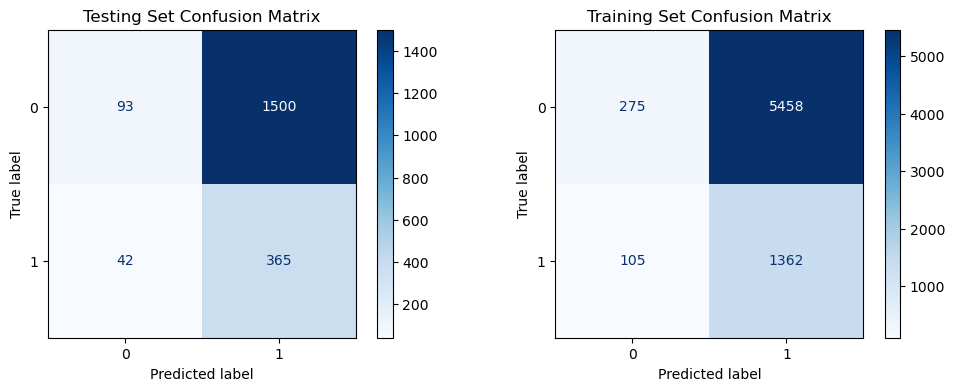


----------------------------- Training -----------------------------


              precision    recall  f1-score   support

           0       0.72      0.05      0.09      5733
           1       0.20      0.93      0.33      1467

    accuracy                           0.23      7200
   macro avg       0.46      0.49      0.21      7200
weighted avg       0.62      0.23      0.14      7200

                        
----------------------------- Testing -----------------------------


              precision    recall  f1-score   support

           0       0.69      0.06      0.11      1593
           1       0.20      0.90      0.32       407

    accuracy                           0.23      2000
   macro avg       0.44      0.48      0.21      2000
weighted avg       0.59      0.23      0.15      2000


----------------------------- ROC -----------------------------




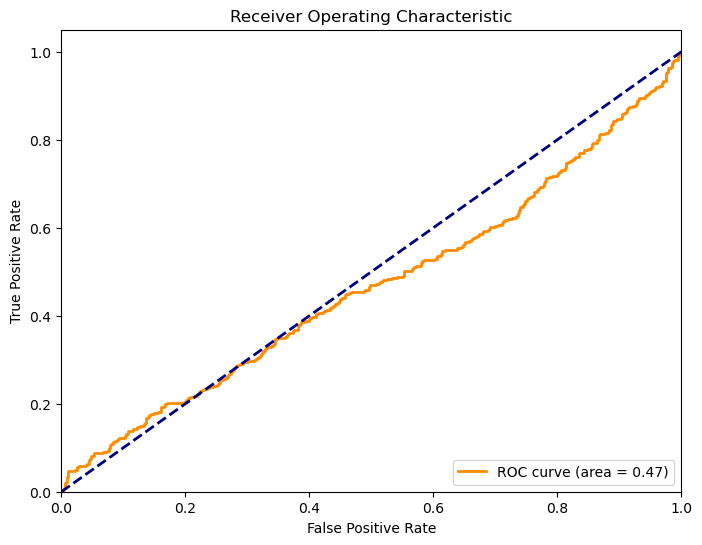

In [221]:
model_Evaluation_results(After_Optuna_Model, x_train, y_train, x_test, y_test)

In [ ]:
# Since the results provided by optuna's model aren't the best, the final model will be one of the previous ones 
# (Early stopping val_rall)

# Final Model and Model Deployment

In [223]:
import pickle
pickle.dump(MinMax_Scaler, open("MinMax_Scaler", "wb"))



In [231]:
pickle.dump(column_trans, open("column_trans", "wb"))

In [232]:
EarlyS_R_Model.save("model_churn.h5")

In [233]:
from tensorflow.keras.models import load_model

## Prediction

In [234]:
model_churn = load_model("model_churn.h5")
MinMax_Scaler = pickle.load(open("MinMax_Scaler", "rb"))

In [263]:
Single_pred = df.drop("Exited", axis=1).iloc[0:1, :]
Single_pred

CreditScore Geography  Gender  Age  Tenure  Balance  NumOfProducts  \
0          619    France       0   42       2      0.0              1   

   HasCrCard  IsActiveMember  EstimatedSalary  
0          1               1        101348.88

In [264]:
Single_pred=column_trans.transform(Single_pred)
Single_pred.shape

(1, 12)

In [265]:
Single_pred=MinMax_Scaler.transform(Single_pred)
Single_pred

array([[1.        , 0.        , 0.        , 0.58169935, 0.39215686,
        0.        , 0.        , 0.        , 0.38800974, 0.        ,
        1.        , 1.        ]])

In [266]:
(model_churn.predict(Single_pred) > 0.5).astype("int32")

array([[1]])

In [267]:
df["Exited"].iloc[0:1]

0    1
Name: Exited, dtype: int64

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___